In [7]:
pip show sklearn

Note: you may need to restart the kernel to use updated packages.


# Top 1000 Highest Grossing Movies Dataset

For this portfolio, I will be analyzing the Top 1000 Highest Grossing Hollywood Movies to hopefully pinpoint relationships that contribute to a movie's sales.

### Research Question/Goal: 
##### Identify features or factors that contribute to a movie's success, specifically, a movie's sales. 
###### >Pinpoint relationships among the different features of a movie's success
###### >Express analysis findings and observations
###### >Propose models that can be used to predict a movie's financial success
###### >Analyze and evaluate the models
###### >Provide recommendations to further improve the study

### Approach: From Kaggle, I was able to find two different datasets on the top 1000 highest grossing movies dataset. Upon inspection, they both contain vital features that may be used for relationship analysis. Because of this reason, I've decided to use and merge both datasets to serve the purpose of my analysis.

### Dataset 1: (This will be called 'raw' dataset)
#### Uploaded by GODSENT ABODE from Kaggle
###### Kaggle Link: https://www.kaggle.com/datasets/therealoise/top-1000-highest-grossing-movies-of-all-time

**Dataset Description：**
This Dataset displays only the top 1000 highest grossing feature films of all time as of September 5, 2022. It is in the same order as displayed on the Box Office Mojo website

**Dataset Detail Information*
The dataset contains 1,000 records in total. Every record has 10 features which are described below. 

    1. Movie Title: The name of the movie.
    2. Year of Release: The year the movie was released.
    3. Genre: Categories where the movie belongs.
    4. Movie Rating: Ratings given by IMDb registered users (on a scale of 1 to 10)
    5. Duration: Movie running time in minutes.
    6. Gross: Gross earnings in U.S. dollars or domestic sales
    7. Worldwide LT Gross: Worldwide Lifetime Gross (International + Domestic totals.
    8. Metascore: Weighted average of many reviews coming from reputed critics (on a scale of 0 to 100)
    9. Votes: Number of votes cast by IMDb registered users.
    10. Logline: A one or two sentence summary of the film.

### Dataset 2: (This will be called 'raw2' dataset)
#### Uploaded by SANJEET SINGH NAIK from Kaggle
###### Kaggle Link: https://www.kaggle.com/datasets/sanjeetsinghnaik/top-1000-highest-grossing-movies?resource=download

**Dataset Description：**
This dataset contains information about the top 1000 highest grossing holywood films. It is up to date as of 10th January 2022.

**Dataset Detail Information*
The dataset contains 918 records in total. Every record has 12 features which are described below. 

    1. 'Unnamed: 0' : This is just index 
    2. 'Title' : similar to Movie Title above
    3. 'Movie Info' :synopsis similar to Logline above
    4. 'Distributor' : company that produced the film
    5. 'Release Date' : date
    6. 'Domestic Sales (in $)' : similar to gross above 
    7. 'International Sales (in $)' : sales outside of the US
    8. 'World Sales (in $)' : total global sales same to worldwide LT Gross above
    9. 'Genre' : same to Genre above
    10.'Movie Runtime' : same to duration above but in hours
    11.'License' : license ratings, age of intended viewership
    12.'Year' : same as Year of Release above

### Merged Dataset: (This dataset will be used for the analysis and its pre-cleaned-up state shall be called "pre_data")

**Dataset Detail Information*
The dataset contains 1,000 records in total. Every record has 13 features which are described as below. The features/columns listed below will be used as the baseline features for this portfolio. These will be further assessed and refined later on.

    1. 'Movie Title' 
    2. 'Year' 
    3. 'Genre_x' 
    4. 'Movie Rating' 
    5. 'Duration' 
    6. 'Gross'
    7. 'International Sales (in $)'
    8. 'Worldwide LT Gross' 
    9. 'Metascore' 
    10.'Votes' 
    11.'Distributor' 
    12.'Month'
    13.'License'


**Outline:**

Pre-Work

Chapter 1. Data Preparation

Chapter 2. Data Analysis

Chapter 3. Data Modelling and Data Models Evaluation

Conclusion/Overall Findings

# Pre-work: Merging of Two Datasets Prior commencement of Data Preparation Proper

In [1]:
#imported all relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


In [2]:
#loaded dataset 1
raw = pd.read_csv('highest_grossing_movies.csv')
raw.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


In [3]:
#loaded dataset 2
raw2 = pd.read_csv('highest_grossing_movies2.csv')
raw2.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [4]:
#Got the movie year which will be referenced for the merge later
year_raw2 = raw2['Title'].str.rsplit('(').str[-1].str.replace(')', '').reset_index()

year_raw2.head()

,index,Title
0,0,2015
1,1,2019
2,2,2009
3,3,2018
4,4,2018


In [5]:
#Added a new column named "Year" to the data frame
raw2['Year'] = year_raw2['Title']

raw2.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018


In [6]:
#set title values of dataset 2 to lowercase so it will be easier to merge later on
raw2['Title'] = raw2['Title'].str.lower()
raw2.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,star wars: episode vii - the force awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,avengers: endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,black panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,avengers: infinity war (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018


In [7]:
#imported re
import re

#removed the year from the title so that titles can be aligned between the two datasets
raw2['Title'] = raw2['Title'].apply(lambda x: re.sub(r'\(\d{4}\)', '', x))
raw2.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,star wars: episode vii - the force awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,avengers: endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,avatar,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,black panther,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,avengers: infinity war,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018


In [8]:
#set title values of dataset 1 to lowercase so it will be easier to merge later on
raw['Movie Title'] = raw['Movie Title'].str.lower()
raw.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


In [9]:
#removed leading and trailing whitespaces in preparation for the merge
raw2['Title'] = raw2['Title'].apply(lambda x: x.strip())
raw2.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
0,0,star wars: episode vii - the force awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,avengers: endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,2,avatar,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,3,black panther,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,4,avengers: infinity war,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018


In [10]:
#removed leading and trailing whitespaces in preparation for the merge
raw['Movie Title'] = raw['Movie Title'].apply(lambda x: x.strip())
raw.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


In [11]:
#Got shape of dataset 2 titles present in dataset 1
raw2[raw2['Title'].isin(raw['Movie Title']) == True].shape

(733, 12)

In [12]:
#Got shape of dataset 1 titles present in dataset 2
raw[raw['Movie Title'].isin(raw2['Title']) == True].shape

(737, 10)

###### In preparation for the merge, the succeeding parts will be aligning the movie titles for both dataset 1 and dataset 2

In [13]:
#checked which movie titles from dataset 2 are in dataset 1. For those that matched, made the title names the same for both datasets
#got results dataframe which consists of all the records that matched

results = pd.DataFrame()
for title, year in zip(raw2['Title'], raw2['Year']):
    matches = pd.DataFrame(raw.loc[(raw['Movie Title'].str.contains(title, case=False)) & (raw['Year of Realease'] == year)])
    if not matches.empty:
        matches['Movie Title'] = title
        raw.loc[(raw['Movie Title'].str.contains(title, case=False)) & (raw['Year of Realease'] == year), 'Movie Title'] = title
    results = pd.concat([results,matches])
results.shape

(740, 10)

In [14]:
#checked that alignment of titles is successful
raw.head(50)

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...
5,spider-man: no way home,2021,"Action,Adventure,Fantasy",8.3,148,$804.75M,"$1,911,432,550",71,"735,006","With Spider-Man's identity now revealed, Peter..."
6,jurassic world,2015,"Action,Adventure,Sci-Fi",6.9,124,$652.27M,"$1,671,537,444",59,"640,590","A new theme park, built on the original site o..."
7,the lion king,2019,"Animation,Adventure,Drama",6.8,118,$543.64M,"$1,663,250,487",55,"244,170","After the murder of his father, a young lion p..."
8,the avengers,2012,"Action,Adventure,Sci-Fi",8.0,143,$623.28M,"$1,518,815,515",69,"1,381,149",Earth's mightiest heroes must come together an...
9,furious 7,2015,"Action,Crime,Thriller",7.1,137,$353.01M,"$1,515,341,399",67,"389,484",Deckard Shaw seeks revenge against Dominic Tor...


In [15]:
#dropped cause even there might be movie sequels released in the same year

results.drop_duplicates(inplace=True)

results.shape

(740, 10)

In [16]:
#checked that all records that matched are in dataset 2
results[results['Movie Title'].isin(raw2['Title']) == True].shape

(740, 10)

In [17]:
#checked if all records that matched are in dataset 1
results[results['Movie Title'].isin(raw['Movie Title']) == True].shape

(737, 10)

Based on the result, there are 3 records not in dataset 1

In [18]:
#checked which records are not in dataset 1
results[results['Movie Title'].isin(raw['Movie Title']) == False]

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
88,wonder woman,2017,"Action,Adventure,Fantasy",7.4,141,$412.56M,"$822,854,286",76,"653,072",When a pilot crashes and tells of conflict in ...
59,the lord of the rings: the two towers,2002,"Action,Adventure,Drama",8.8,179,$342.55M,"$947,896,241",87,"1,649,383",While Frodo and Sam edge closer to Mordor with...
48,the hobbit: an unexpected journey,2012,"Adventure,Fantasy",7.8,169,$303.00M,"$1,017,030,651",58,"823,402","A reluctant Hobbit, Bilbo Baggins, sets out to..."


In [19]:
#checked if wonder woman is in the records that matched
results[results['Movie Title'] == 'wonder woman']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
88,wonder woman,2017,"Action,Adventure,Fantasy",7.4,141,$412.56M,"$822,854,286",76,"653,072",When a pilot crashes and tells of conflict in ...


In [20]:
#checked if wonder woman is in dataset 1
raw[raw['Movie Title'] == 'wonder woman']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline


###### Wonder woman is found to be missing in dataset 1. Upon investigation, it is due to having a movie included at the top 1000 highest grossing titled "wonder", which was also released the same year as wonder woman. For the 3 missing records identified, it is due to this reason. With this said,  since these are only 3 records, I will be manually correcting these in the succeeding parts.

In [21]:
#checked records with 'wonder' as their movie titles
raw[raw['Movie Title'] == 'wonder']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
88,wonder,2017,"Action,Adventure,Fantasy",7.4,141,$412.56M,"$822,854,286",76,"653,072",When a pilot crashes and tells of conflict in ...
507,wonder,2017,"Drama,Family",7.9,113,$132.42M,"$306,209,289",66,"164,180","Based on the New York Times bestseller, this m..."


In [22]:
#checked that wonder woman is not missing from dataset 2
raw2[raw2['Title'] == 'wonder woman']

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
31,31,wonder woman,When a pilot crashes and tells of conflict in ...,Warner Bros.,"May 30, 2017",412815408,410009114,822824522,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi', '...",2 hr 21 min,PG-13,2017


In [23]:
#checked that wonder woman is not missing from dataset 2
raw2[raw2['Title'] == 'wonder']

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year
456,456,wonder,"Based on the New York Times bestseller, this m...",Lionsgate,NaN,132422809,173786480,306209289,"['Drama', 'Family']",1 hr 53 min,NaN,2017


###### The 3 records shall now be manually corrected for the next 6 lines of code.

In [24]:
raw.loc[88, 'Movie Title'] = 'wonder woman'

In [25]:
#checked that correction was successful
raw[raw['Movie Title'] == 'wonder woman']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
88,wonder woman,2017,"Action,Adventure,Fantasy",7.4,141,$412.56M,"$822,854,286",76,"653,072",When a pilot crashes and tells of conflict in ...


In [26]:
raw.loc[59, 'Movie Title'] = 'the lord of the rings: the two towers'

In [27]:
#checked that correction was successful
raw.loc[59]['Movie Title']

'the lord of the rings: the two towers'

In [28]:
raw.loc[48, 'Movie Title'] = 'the hobbit: an unexpected journey'

In [29]:
#checked that correction was successful
raw.loc[48]['Movie Title']

'the hobbit: an unexpected journey'

In [30]:
#checked that now all matched records are in dataset 1
results[results['Movie Title'].isin(raw['Movie Title']) == True].shape

(740, 10)

In [31]:
#checked if count is the same as above
raw[raw['Movie Title'].isin(results['Movie Title']) == True].shape

(741, 10)

###### The next 2 lines of code will be checking if there are duplicates that might have caused the discrepancy with the counts above.

In [32]:
matched = raw[raw['Movie Title'].isin(results['Movie Title']) == True]

In [33]:
matched[matched['Movie Title'].duplicated()].count

<bound method DataFrame.count of                       Movie Title Year of Realease  \
38                  the lion king             1994   
195                           ted             2012   
225                       aladdin             1992   
299          beauty and the beast             1991   
315                     the mummy             2017   
355                      godzilla             1998   
629                            us             2019   
668                      hercules             2014   
675                          home             2015   
719                  ghostbusters             2016   
734                            it             2017   
831               the jungle book             1967   
855  teenage mutant ninja turtles             1990   
870                  total recall             2012   
903             the addams family             1991   
932                            it             2017   
999                            it             201

###### From above, I found out that there are 17 records tagged as duplicates.

######  I checked the 17 records tagged as duplicates and I found that the following 11 duplicates should be okay since they have different years of release. These are probably remakes or live action adapatations:

In [34]:
#1
raw.loc[raw['Movie Title'] == 'the lion king']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
7,the lion king,2019,"Animation,Adventure,Drama",6.8,118,$543.64M,"$1,663,250,487",55,"244,170","After the murder of his father, a young lion p..."
38,the lion king,1994,"Animation,Adventure,Drama",8.5,88,$422.78M,"$1,063,611,805",88,"1,048,260",Lion prince Simba and his father are targeted ...


In [35]:
#2
raw[raw['Movie Title'] == 'aladdin']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
40,aladdin,2019,"Adventure,Comedy,Family",6.9,128,$355.56M,"$1,050,693,953",53,"264,450",A kind-hearted street urchin and a power-hungr...
225,aladdin,1992,"Animation,Adventure,Comedy",8.0,90,$217.35M,"$504,050,219",86,"416,811",A kindhearted street urchin and a power-hungry...


In [36]:
#3
raw[raw['Movie Title'] == 'beauty and the beast']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
18,beauty and the beast,2017,"Adventure,Family,Fantasy",7.1,129,$504.01M,"$1,273,576,220",65,"308,027",A selfish Prince is cursed to become a monster...
299,beauty and the beast,1991,"Animation,Family,Fantasy",8.0,84,$218.97M,"$424,967,620",95,"453,187",A prince cursed to spend his days as a hideous...


In [37]:
#4
raw[raw['Movie Title'] == 'the mummy']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
305,the mummy,1999,"Action,Adventure,Fantasy",7.1,124,$155.25M,"$415,933,406",48,"428,601",At an archaeological dig in the ancient city o...
315,the mummy,2017,"Action,Adventure,Fantasy",5.4,111,$80.10M,"$409,231,607",34,"190,176",An ancient Egyptian princess is awakened from ...


In [38]:
#5
raw[raw['Movie Title'] == 'godzilla']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
214,godzilla,2014,"Action,Adventure,Sci-Fi",6.4,123,$200.68M,"$524,976,069",62,"413,560",The world is beset by the appearance of monstr...
355,godzilla,1998,"Action,Sci-Fi,Thriller",5.4,139,$136.31M,"$379,014,294",32,"194,147",French nuclear tests irradiate an iguana into ...


In [39]:
#6
raw[raw['Movie Title'] == 'hercules']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
636,hercules,1997,"Animation,Adventure,Comedy",7.3,93,$99.05M,"$252,712,101",74,"231,152",The son of Zeus and Hera is stripped of his im...
668,hercules,2014,"Action,Adventure,Fantasy",6.0,98,$72.69M,"$244,819,862",47,"156,568","Having endured his legendary twelve labors, He..."


In [40]:
#7
raw[raw['Movie Title'] == 'the jungle book']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
53,the jungle book,2016,"Adventure,Drama,Family",7.4,106,$364.00M,"$966,554,929",77,"277,311",After a threat from the tiger Shere Khan force...
831,the jungle book,1967,"Animation,Adventure,Comedy",7.6,78,$141.84M,"$205,843,612",65,"183,055",Bagheera the Panther and Baloo the Bear have a...


In [41]:
#8
raw[raw['Movie Title'] == 'teenage mutant ninja turtles']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
238,teenage mutant ninja turtles,2014,"Action,Adventure,Comedy",5.8,101,$191.20M,"$485,004,754",31,"211,216","When a kingpin threatens New York City, a grou..."
855,teenage mutant ninja turtles,1990,"Action,Adventure,Comedy",6.7,93,$135.27M,"$202,084,756",51,"94,675",Four teenage mutant ninja turtles emerge from ...


In [42]:
#9
raw[raw['Movie Title'] == 'total recall']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
609,total recall,1990,"Action,Adventure,Sci-Fi",7.5,113,$119.39M,"$261,317,921",57,"330,462",When a man goes in to have virtual vacation me...
870,total recall,2012,"Action,Adventure,Sci-Fi",6.2,118,$58.88M,"$198,467,168",43,"254,967","A factory worker, Douglas Quaid, begins to sus..."


In [43]:
#10
raw[raw['Movie Title'] == 'the addams family']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
845,the addams family,2019,"Animation,Comedy,Family",5.8,86,$100.04M,"$203,785,209",46,"39,322",The eccentrically macabre family moves to a bl...
903,the addams family,1991,"Comedy,Fantasy",6.9,99,$113.50M,"$191,502,426",57,"155,569",Con artists plan to fleece an eccentric family...


In [44]:
#11
raw[raw['Movie Title'] == 'ghostbusters']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
535,ghostbusters,1984,"Action,Comedy,Fantasy",7.8,105,$238.63M,"$296,578,797",71,"412,928",Three parapsychologists forced out of their un...
719,ghostbusters,2016,"Action,Comedy,Fantasy",6.9,117,$128.34M,"$229,147,509",60,"231,550","Following a ghost invasion of Manhattan, paran..."


###### For the ones below, these are duplicates and will be handled accordingly

In [45]:
raw[raw['Movie Title'] == 'ted']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
116,ted,2012,"Animation,Adventure,Comedy",6.8,95,$216.39M,"$746,921,274",60,"181,744",The Madagascar animals join a struggling Europ...
195,ted,2012,Comedy,6.9,106,$218.82M,"$549,368,315",62,"612,897","John Bennett, a man whose childhood wish of br..."


In [46]:
raw[raw['Movie Title'] == 'us']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
110,us,2019,"Action,Adventure,Thriller",6.5,137,$173.96M,"$759,056,935",60,"211,651","Lawman Luke Hobbs (Dwayne ""The Rock"" Johnson) ..."
629,us,2019,"Horror,Mystery,Thriller",6.8,116,$175.08M,"$255,228,914",81,"294,642",A family's serene beach vacation turns to chao...


In [47]:
raw[raw['Movie Title'] == 'home']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
345,home,2015,"Animation,Adventure,Comedy",6.6,94,$177.40M,"$386,041,607",55,"103,018",An alien on the run from his own people makes ...
675,home,2015,"Comedy,Family",6.1,96,$150.36M,"$242,786,137",42,"120,075",Brad Whitaker is a radio host trying to get hi...


In [48]:
raw[raw['Movie Title'] == 'it']

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
132,it,2017,Horror,7.3,135,$327.48M,"$701,842,551",69,"540,445","In the summer of 1989, a group of bullied kids..."
734,it,2017,"Action,Adventure,Fantasy",6.4,136,$41.19M,"$225,973,340",51,"181,635","A dark force threatens Alpha, a vast metropoli..."
932,it,2017,"Comedy,Music",5.8,93,$104.90M,"$185,400,345",40,"64,635","Following their win at the world championship,..."
999,it,2017,"Action,Comedy,Crime",6.9,118,$75.47M,"$176,600,207",47,"230,821",One of the world's top bodyguards gets a new c...


In [49]:
#corrected the records
raw.loc[116, 'Movie Title'] = "madagascar 3: europe's most wanted"
raw.loc[110, 'Movie Title'] = 'fast & furious presents: hobbs & shaw'
raw.loc[675, 'Movie Title'] = "daddy's home"
raw.loc[734, 'Movie Title'] = 'valerian and the city of a thousand planets'
raw.loc[932, 'Movie Title'] = 'pitch perfect 3'
raw.loc[999, 'Movie Title'] = "the hitman's bodyguard"

In [50]:
#checked that the duplicates count should only be 11 pertaining to the 11 records with similar titles but different year of release
matched = raw[raw['Movie Title'].isin(results['Movie Title']) == True]
matched[matched['Movie Title'].duplicated()].count()

Movie Title           11
Year of Realease      11
Genre                 11
Movie Rating          11
Duration              11
Gross                 11
Worldwide LT Gross    11
Metascore             11
Votes                 11
Logline               11
dtype: int64

In [51]:
#got the unmatched records from dataset 1
unmatched = raw[raw['Movie Title'].isin(results['Movie Title']) == False]
unmatched.shape

(265, 10)

###### For the next part, I will be repeating the titles and year alignment done above but it will be done the other way around because earlier I checked which movie titles from dataset 2 are in dataset 1 but I I haven't checked the other way around. For example if 'rogue one' from dataset 2 is matched with 'rogue one: a star wars story' from dataset 1 was matched; but since I used '.contains' command; if roles were reversed, where dataset 1 has 'rogue one' and dataset 2 has 'rogue one: a star wars story'; there will be no match.

In [52]:
#checked which movie titles from dataset 1 are in dataset 2. For those that matched, made the title names the same for both datasets
#got results dataframe which consists of all the records that matched similar to above

results2 = pd.DataFrame()
for title, year in zip(unmatched['Movie Title'], unmatched['Year of Realease']):
    matches2 = pd.DataFrame(raw2.loc[(raw2['Title'].str.contains(title, case=False)) & (raw2['Year'] == year)])
    if not matches2.empty:
        matches2['Title'] = title
        raw2.loc[(raw2['Title'].str.contains(title, case=False)) & (raw2['Year'] == year), 'Title'] = title
    results2 = pd.concat([results2,matches2])
results2.shape

(17, 12)

In [53]:
#checked that all 17 records are already aligned with raw dataset in terms of Movie Titles
results2[results2['Title'].isin(raw['Movie Title']) == True].shape

(17, 12)

In [54]:
#checked the number of records present in dataset 1 which are not present in dataset 2
len(raw) - (len(results) + len(results2))

243

###### This means that 243 records are not present in dataset 2. This is expected considering that the length of dataset 2 is only 918; and that it was last updated January 2022 while dataset 1 was last updated September 2022.

#### Now that the movie titles have been aligned for both dataframes, I will proceed to merge the two datasets as planned.

## The Merge: The Last Step of the Pre-work before I move to data preparation proper

In [55]:
#merged the two datasets
raw_merged = raw.copy().merge(raw2.copy(), 
                  left_on = ['Movie Title', 'Year of Realease'], 
                  right_on = ['Title', 'Year'], 
                  how = 'left')

In [56]:
#checked that number of rows and columns is as expected after the merge
raw_merged.shape

(1000, 22)

In [57]:
#checked if merge was successful
raw_merged.tail()

,Movie Title,Year of Realease,Genre_x,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline,...,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre_y,Movie Runtime,License,Year
995,the a-team,2010,"Action,Adventure,Thriller",6.7,117,$77.22M,"$177,238,796",47,"259,316",A group of Iraq War veterans look to clear the...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,tootsie,1982,"Comedy,Drama,Romance",7.4,116,$177.20M,"$177,200,271",88,"107,311","Michael Dorsey, an unsuccessful actor, disguis...",...,"Michael Dorsey, an unsuccessful actor, disguis...",Columbia Pictures,"December 17, 1982",177200000.0,177200000.0,177200000.0,"['Comedy', 'Drama', 'Romance']",1 hr 56 min,NaN,1982
997,in the line of fire,1993,"Action,Crime,Drama",7.2,128,$102.31M,"$176,997,168",74,"104,598",Secret Service agent Frank Horrigan couldn't s...,...,Secret Service agent Frank Horrigan (Clint Eas...,Columbia Pictures,"July 9, 1993",102314823.0,74682345.0,176997168.0,"['Action', 'Crime', 'Drama', 'Thriller']",2 hr 8 min,R,1993
998,analyze this,1999,"Comedy,Crime",6.7,103,$106.89M,"$176,885,658",61,"154,726",A comedy about a psychiatrist whose number-one...,...,A comedy about a psychiatrist whose number one...,Warner Bros.,"March 5, 1999",106885658.0,70000000.0,176885658.0,"['Comedy', 'Crime']",1 hr 43 min,R,1999
999,the hitman's bodyguard,2017,"Action,Comedy,Crime",6.9,118,$75.47M,"$176,600,207",47,"230,821",One of the world's top bodyguards gets a new c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#dropped columns not needed
pre_data = raw_merged.copy().drop(['Unnamed: 0','Title','Logline', 'Movie Info', 'World Sales (in $)', 'Domestic Sales (in $)',
                                  'Genre_y', 'Year', 'Movie Runtime'], axis=1)

#checked drop was successful
pre_data.head()

,Movie Title,Year of Realease,Genre_x,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Distributor,Release Date,International Sales (in $),License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",Twentieth Century Fox,"December 16, 2009",2.086739e+09,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",Walt Disney Studios Motion Pictures,"April 24, 2019",1.939128e+09,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",Paramount Pictures,"December 19, 1997",1.542283e+09,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551",Walt Disney Studios Motion Pictures,"December 16, 2015",1.132859e+09,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",Walt Disney Studios Motion Pictures,NaN,1.369544e+09,NaN


#### Removed Logline, Movie Info and Unnamed: 0 since these will not be used by the model. Also removed the following: Title, World Sales (in $), Domestic Sales (in $), Genre_y, Year and Movie Runtime since these are already available from main dataframe (raw).


In [59]:
#renamed the misspelled column
#renamed Release Date to month since this will be transformed to display only the month
pre_data = pre_data.rename(columns={'Year of Realease': 'Year'})
pre_data = pre_data.rename(columns={'Release Date': 'Month'})
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Distributor,Month,International Sales (in $),License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",Twentieth Century Fox,"December 16, 2009",2.086739e+09,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",Walt Disney Studios Motion Pictures,"April 24, 2019",1.939128e+09,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",Paramount Pictures,"December 19, 1997",1.542283e+09,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551",Walt Disney Studios Motion Pictures,"December 16, 2015",1.132859e+09,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",Walt Disney Studios Motion Pictures,NaN,1.369544e+09,NaN


In [60]:
#re-arranged the columns for ease of viewing
pre_data.columns
pre_data = pre_data[['Movie Title', 'Year', 'Genre_x', 'Movie Rating', 'Duration', 'Gross','International Sales (in $)',
       'Worldwide LT Gross', 'Metascore', 'Votes', 'Distributor', 'Month','License']]

In [61]:
#checked reordering of columns was successful
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,2.086739e+09,"$2,847,397,339",83,"1,236,962",Twentieth Century Fox,"December 16, 2009",PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,1.939128e+09,"$2,797,501,328",78,"1,108,641",Walt Disney Studios Motion Pictures,"April 24, 2019",PG-13
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,1.542283e+09,"$2,201,647,264",75,"1,162,142",Paramount Pictures,"December 19, 1997",PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,1.132859e+09,"$2,069,521,700",80,"925,551",Walt Disney Studios Motion Pictures,"December 16, 2015",PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,1.369544e+09,"$2,048,359,754",68,"1,062,517",Walt Disney Studios Motion Pictures,NaN,NaN


In [62]:
#As mentioned previously,Got month only for date just in case this will have a factor in the relationships analysis later on
pre_data['Month'] = pre_data['Month'].str.rsplit(' ').str[0]

#checked that months have been retained successfully
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,2.086739e+09,"$2,847,397,339",83,"1,236,962",Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,1.939128e+09,"$2,797,501,328",78,"1,108,641",Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,1.542283e+09,"$2,201,647,264",75,"1,162,142",Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,1.132859e+09,"$2,069,521,700",80,"925,551",Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,1.369544e+09,"$2,048,359,754",68,"1,062,517",Walt Disney Studios Motion Pictures,NaN,NaN


#### Now that I have aligned and merged the two datasets; and removed unnecessary columns; I can now proceed to the first chapter of this comprehensive data analysis activity: preparation of data. For this part, I will be ensuring that the dataset will be cleaned up and organized in preparation for the data analysis proper and modelling.

# Chapter 1: Data Preparation

## 1.1 Data Cleanup

### 1.1.1 Missing Data Handling

In [63]:
#Checked each column of the data for any missing values.
#Displayed the names of the columns with missing values and their corresponding number of missing values. 
#Printed the length of the data before removing the missing data.

missing_values = pre_data.isnull().sum()

print(missing_values)

pre_data.shape

Movie Title                     0
Year                            0
Genre_x                         0
Movie Rating                    0
Duration                        0
Gross                           0
International Sales (in $)    252
Worldwide LT Gross              0
Metascore                       0
Votes                           0
Distributor                   252
Month                         340
License                       383
dtype: int64


(1000, 13)

###### From the exercise above, I have identified taht there are 4 features with missing values:

        1. International Sales (in $)    252
        2. Distributor                   252
        3. Month                         340
        4. License                       383

Given that 1) these are large numbers of records and 2) considering that some of these records might hold valuable data for the other features; I will not be outrightly removing these rows. Each mentioned feature will be handled differently according to the characteristics and preliminary feature analysis done for each.

In [64]:
#checked values of the features
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,2.086739e+09,"$2,847,397,339",83,"1,236,962",Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,1.939128e+09,"$2,797,501,328",78,"1,108,641",Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,$659.33M,1.542283e+09,"$2,201,647,264",75,"1,162,142",Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,1.132859e+09,"$2,069,521,700",80,"925,551",Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,1.369544e+09,"$2,048,359,754",68,"1,062,517",Walt Disney Studios Motion Pictures,NaN,NaN


#### i. International Sales

For this feature, since we have data for worldwide sales and Gross Local(US) sales for all data; this can be computed by taking the difference of the worldwide sales and the gross local sales. I noticed that Gross Sales and Worldwide Sales have '$' signs and letters such as M representing millions. I will have to handle these first before I proceed with the computation of the difference between the two. Also, I noticed that the Votes feature also have commas. While I am at it, I will be handling this as well even if it's not yet relevant for the computation of International Sales; as these will also need handling sooner or later.

In [65]:
#checked unique values of World Sales for values that may need to be handled
pre_data['Worldwide LT Gross'].unique()

array(['$2,847,397,339', '$2,797,501,328', '$2,201,647,264',
       '$2,069,521,700', '$2,048,359,754', '$1,911,432,550',
       '$1,671,537,444', '$1,663,250,487', '$1,518,815,515',
       '$1,515,341,399', '$1,450,026,933', '$1,440,739,744',
       '$1,402,809,540', '$1,347,597,973', '$1,342,359,942',
       '$1,332,698,830', '$1,310,466,296', '$1,281,508,100',
       '$1,273,576,220', '$1,243,089,244', '$1,236,005,118',
       '$1,214,811,252', '$1,159,444,662', '$1,153,337,496',
       '$1,148,528,393', '$1,146,436,214', '$1,131,927,996',
       '$1,128,462,972', '$1,123,794,079', '$1,108,569,499',
       '$1,104,054,072', '$1,099,699,003', '$1,081,153,097',
       '$1,074,445,730', '$1,074,149,279', '$1,073,394,593',
       '$1,066,970,811', '$1,066,179,747', '$1,063,611,805',
       '$1,057,420,387', '$1,050,693,953', '$1,045,713,802',
       '$1,034,800,131', '$1,028,570,942', '$1,027,082,707',
       '$1,025,468,216', '$1,024,121,104', '$1,022,290,019',
       '$1,017,030,651',

In [66]:
#checked unique values of Gross Sales for values that may need to be handled
pre_data['Gross'].unique()

array(['$760.51M', '$858.37M', '$659.33M', '$936.66M', '$678.82M',
       '$804.75M', '$652.27M', '$543.64M', '$623.28M', '$353.01M',
       '$477.37M', '******', '$459.01M', '$700.06M', '$381.01M',
       '$620.18M', '$417.72M', '$400.74M', '$504.01M', '$608.58M',
       '$226.01M', '$409.01M', '$336.05M', '$408.08M', '$335.06M',
       '$377.85M', '$390.53M', '$426.83M', '$352.39M', '$304.36M',
       '$245.44M', '$402.45M', '$448.14M', '$335.45M', '$515.20M',
       '$434.04M', '$415.00M', '$423.32M', '$422.78M', '$532.18M',
       '$355.56M', '$241.06M', '$264.62M', '$486.30M', '$474.54M',
       '$334.19M', '$341.27M', '$317.58M', '$303.00M', '$534.86M',
       '$295.98M', '$368.06M', '$364.00M', '$404.52M', '$255.12M',
       '$309.42M', '$258.37M', '$342.55M', '$292.00M', '$380.84M',
       '$301.96M', '$436.47M', '$216.43M', '$0.34M', '$315.54M',
       '$290.01M', '$336.53M', '$196.57M', '$200.07M', '$334.20M',
       '$261.99M', '$161.32M', '$368.38M', '$330.36M', '$2.72M',
 

###### Upon inspection of the unique values, I noticed there are records with asterisks (*) so I will be handling these as well. I will first replace these values with 0 and later on, I will replacing these with mean values since essentially these are missing values.

In [67]:
# removed the dollar signs, commas and magnitude letters from the world and local sales
pre_data['Worldwide LT Gross'] = pre_data['Worldwide LT Gross'].str.replace('$', '').str.replace('M', 'e6').str.replace('K', 'e3').str.replace(',', '').str.replace('*', '0')
pre_data['Gross'] = pre_data['Gross'].str.replace('$', '').str.replace('M', 'e6').str.replace('K', 'e3').str.replace(',', '').str.replace('*', '0')

#removed commas from Votes feature
pre_data['Votes'] = pre_data['Votes'].str.replace(',', '')

#checked that value replacement was successful
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,760.51e6,2.086739e+09,2847397339,83,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,858.37e6,1.939128e+09,2797501328,78,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,659.33e6,1.542283e+09,2201647264,75,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,936.66e6,1.132859e+09,2069521700,80,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,678.82e6,1.369544e+09,2048359754,68,1062517,Walt Disney Studios Motion Pictures,NaN,NaN


In [68]:
# converted 'World Sales (in $)' and 'Local US Sales (in $)' columns to numeric
pre_data['Worldwide LT Gross'] = pd.to_numeric(pre_data['Worldwide LT Gross'], errors='coerce')
pre_data['Gross'] = pd.to_numeric(pre_data['Gross'], errors='coerce')

#checked that conversion to numeric was successful
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,760510000.0,2.086739e+09,2847397339,83,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,858370000.0,1.939128e+09,2797501328,78,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,659330000.0,1.542283e+09,2201647264,75,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,936660000.0,1.132859e+09,2069521700,80,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,678820000.0,1.369544e+09,2048359754,68,1062517,Walt Disney Studios Motion Pictures,NaN,NaN


In [69]:
#checked if there are any other features in need of conversion to numeric
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movie Title                 1000 non-null   object 
 1   Year                        1000 non-null   object 
 2   Genre_x                     1000 non-null   object 
 3   Movie Rating                1000 non-null   float64
 4   Duration                    1000 non-null   int64  
 5   Gross                       1000 non-null   float64
 6   International Sales (in $)  748 non-null    float64
 7   Worldwide LT Gross          1000 non-null   int64  
 8   Metascore                   1000 non-null   object 
 9   Votes                       1000 non-null   object 
 10  Distributor                 748 non-null    object 
 11  Month                       660 non-null    object 
 12  License                     617 non-null    object 
dtypes: float64(3), int64(2), object(8)

###### Upon checking, Metascore and Votes are in object dataype. I will be converting these 2 into numeric as well since these will have to be converted later on as we go further into analysis.

In [70]:
# converted Metascore and Votes columns to numeric
pre_data['Metascore'] = pd.to_numeric(pre_data['Metascore'], errors='coerce')
pre_data['Votes'] = pd.to_numeric(pre_data['Votes'], errors='coerce')

#checked that conversion to numeric was successful
pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,760510000.0,2.086739e+09,2847397339,83.0,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,858370000.0,1.939128e+09,2797501328,78.0,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,659330000.0,1.542283e+09,2201647264,75.0,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,936660000.0,1.132859e+09,2069521700,80.0,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,678820000.0,1.369544e+09,2048359754,68.0,1062517,Walt Disney Studios Motion Pictures,NaN,NaN


In [71]:
#checked that conversion to numeric is successful
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movie Title                 1000 non-null   object 
 1   Year                        1000 non-null   object 
 2   Genre_x                     1000 non-null   object 
 3   Movie Rating                1000 non-null   float64
 4   Duration                    1000 non-null   int64  
 5   Gross                       1000 non-null   float64
 6   International Sales (in $)  748 non-null    float64
 7   Worldwide LT Gross          1000 non-null   int64  
 8   Metascore                   964 non-null    float64
 9   Votes                       1000 non-null   int64  
 10  Distributor                 748 non-null    object 
 11  Month                       660 non-null    object 
 12  License                     617 non-null    object 
dtypes: float64(4), int64(3), object(6)

In [72]:
#assigned mean values to gross sales with 0 values. These are the ones with (*) earlier and are essentially missing values
pre_data.loc[pre_data['Gross'] == 0, 'Gross'] = pre_data['Gross'].replace(0, np.nan).mean()

In [73]:
#checked descriptives

pre_data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.00000,1000.000000,1.000000e+03,7.480000e+02,1.000000e+03,964.000000,1.000000e+03
mean,6.80080,117.679000,1.561590e+08,2.685323e+08,4.105976e+08,59.644191,3.393784e+05
std,0.90145,21.561885,1.087307e+08,2.215402e+08,2.951927e+08,15.946919,3.231349e+05
min,2.50000,69.000000,1.000000e+04,2.450000e+07,1.766002e+08,12.000000,3.960000e+02
25%,6.20000,102.000000,9.312500e+07,1.217222e+08,2.220363e+08,48.000000,1.347940e+05
50%,6.80000,116.000000,1.320900e+08,2.006887e+08,3.084121e+08,59.000000,2.448125e+05
75%,7.40000,130.000000,1.837075e+08,3.403835e+08,4.733442e+08,71.000000,4.410002e+05
max,9.20000,238.000000,9.366600e+08,2.086739e+09,2.847397e+09,100.000000,2.622926e+06


In [74]:
#checked that assignment of mean values have been successful

pre_data[pre_data['Gross'] == 0]

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License


In [75]:
#checked that assignment of mean values have been successful
pre_data[np.isclose(pre_data['Gross'], 1.561590e+08)].head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
11,top gun: maverick,2022,"Action,Drama",8.4,130,1.561590e+08,NaN,1440739744,78.0,400255,NaN,NaN,NaN
50,jurassic world dominion,2022,"Action,Adventure,Sci-Fi",5.7,147,1.561590e+08,NaN,994677000,38.0,141776,NaN,NaN,NaN
58,doctor strange in the multiverse of madness,2022,"Action,Adventure,Fantasy",7.0,126,1.561590e+08,NaN,955152198,60.0,393525,NaN,NaN,NaN
69,minions: the rise of gru,2022,"Animation,Adventure,Comedy",6.6,87,1.561590e+08,NaN,890966065,56.0,57702,NaN,NaN,NaN
89,"ni hao, li huanying",2021,"Comedy,Romance",7.0,128,1.561590e+08,NaN,822009764,NaN,2163,NaN,NaN,NaN


###### It can be seen that those with values of 0 previously such as top gun maverick and jurassic world dominion have now assumed the mean value of 1.561590e+08

In [76]:
#checked that those assigned with mean values are equal to 34 which is the number of previously identified values with asterisks
pre_data[np.isclose(pre_data['Gross'], 1.561590e+08)].shape

(34, 13)

In [77]:
#checked that there are no more null values for Local and World Sales

print(pre_data.isnull().sum())

Movie Title                     0
Year                            0
Genre_x                         0
Movie Rating                    0
Duration                        0
Gross                           0
International Sales (in $)    252
Worldwide LT Gross              0
Metascore                      36
Votes                           0
Distributor                   252
Month                         340
License                       383
dtype: int64


In [78]:
#calculated the difference between the World Sales and Local Sales columns
diff = pre_data['Worldwide LT Gross'] - pre_data['Gross']

#assigned the null values in International Sales column with the calculated difference
pre_data.loc[pre_data['International Sales (in $)'].isnull(), 'International Sales (in $)'] = diff

In [79]:
#checked that the assignment of the values were successful

pre_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,"Action,Adventure,Fantasy",7.8,162,760510000.0,2.086739e+09,2847397339,83.0,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,"Action,Adventure,Drama",8.4,181,858370000.0,1.939128e+09,2797501328,78.0,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,"Drama,Romance",7.9,194,659330000.0,1.542283e+09,2201647264,75.0,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,936660000.0,1.132859e+09,2069521700,80.0,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,"Action,Adventure,Sci-Fi",8.4,149,678820000.0,1.369544e+09,2048359754,68.0,1062517,Walt Disney Studios Motion Pictures,NaN,NaN


In [80]:
#checked that there are no more null values for International Sales

print(pre_data.isnull().sum())

Movie Title                     0
Year                            0
Genre_x                         0
Movie Rating                    0
Duration                        0
Gross                           0
International Sales (in $)      0
Worldwide LT Gross              0
Metascore                      36
Votes                           0
Distributor                   252
Month                         340
License                       383
dtype: int64


###### Looking at the summary above, it seems that there are now new null values for Metascore which probably resulted from its conversion to numeric. Before I proceed to Distributor feature, these will be handled first.

#### i.i. Bonus Round: Metascore

In [81]:
#checked unique values of Metascore prior the merge
raw['Metascore'].unique()

array(['83', '78', '75', '80', '68', '71', '59', '55', '69', '67', '64',
       '66', '88', '85', '84', '51', '65', '56', '62', '94', '42', '81',
       '32', '53', '92', '45', '49', '77', '58', '38', '50', '60', '87',
       '90', '******', '73', '63', '61', '44', '76', '35', '74', '52',
       '82', '39', '91', '86', '72', '46', '57', '40', '54', '96', '70',
       '79', '47', '27', '48', '30', '41', '95', '43', '31', '34', '97',
       '33', '24', '26', '20', '28', '37', '89', '100', '19', '36', '23',
       '21', '12', '25', '29'], dtype=object)

###### From the result, it can be easily seen that similar to the Sales features, the Metascore feature also has values with asterisk(*). These are essentially null values as well, and, similar to the sales features; these will also be replaced with mean values.

In [82]:
#assigned mean values to Metascores with null values. These are the ones with (*) earlier and are essentially missing values
pre_data['Metascore'] = pre_data['Metascore'].fillna(pre_data['Metascore'].mean())

In [83]:
#checked descriptives
pre_data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,6.80080,117.679000,1.561590e+08,2.536836e+08,4.105976e+08,59.644191,3.393784e+05
std,0.90145,21.561885,1.087307e+08,2.101695e+08,2.951927e+08,15.656950,3.231349e+05
min,2.50000,69.000000,1.000000e+04,2.450000e+07,1.766002e+08,12.000000,3.960000e+02
25%,6.20000,102.000000,9.312500e+07,1.220320e+08,2.220363e+08,48.000000,1.347940e+05
50%,6.80000,116.000000,1.320900e+08,1.874649e+08,3.084121e+08,59.644191,2.448125e+05
75%,7.40000,130.000000,1.837075e+08,3.009530e+08,4.733442e+08,71.000000,4.410002e+05
max,9.20000,238.000000,9.366600e+08,2.086739e+09,2.847397e+09,100.000000,2.622926e+06


In [84]:
#checked that those assigned with mean values are equal to 36 which is the number of previously identified values with asterisks
pre_data[np.isclose(pre_data['Metascore'], 59.644191)].shape

(36, 13)

In [85]:
#checked that there are no more null values for Metascore

print(pre_data.isnull().sum())

Movie Title                     0
Year                            0
Genre_x                         0
Movie Rating                    0
Duration                        0
Gross                           0
International Sales (in $)      0
Worldwide LT Gross              0
Metascore                       0
Votes                           0
Distributor                   252
Month                         340
License                       383
dtype: int64


#### ii. Distributor

In consideration of the time and resources available, for this feature, I will be replacing null values with 'unknown' as replacing null values with another value may alter the insights that can be derived from the dataset. 

In [86]:
#assigned the null values in Distributor column with unknown
pre_data.loc[pre_data['Distributor'].isnull(), 'Distributor'] = 'unknown'

In [87]:
#checked that the assignment was successful

pre_data['Distributor'].unique()

array(['Twentieth Century Fox', 'Walt Disney Studios Motion Pictures',
       'Paramount Pictures', 'Sony Pictures Entertainment (SPE)',
       'Universal Pictures', 'unknown', 'Warner Bros.', 'New Line Cinema',
       'DreamWorks', 'DreamWorks Distribution', 'Lionsgate',
       'Metro-Goldwyn-Mayer (MGM)', 'Summit Entertainment',
       'Newmarket Films', 'TriStar Pictures', 'The Weinstein Company',
       'Orion Pictures', 'Fox Searchlight Pictures', 'IFC Films',
       '20th Century Studios', 'Miramax', 'United Artists',
       'Columbia Pictures', 'Revolution Studios', 'Artisan Entertainment',
       'Relativity Media', 'Dimension Films', 'USA Films',
       'United Artists Releasing', 'Screen Gems', 'Focus Features',
       'STX Entertainment'], dtype=object)

#### iii. Month

In consideration of the time and resources available, for this feature, I will be replacing null values with 'unknown' as replacing null values with another value may alter the insights that can be derived from the dataset. 

In [88]:
#assigned the null values in Month column with unknown 
pre_data.loc[pre_data['Month'].isnull(), 'Month'] = 'unknown'

In [89]:
#checked that the assignment was successful

pre_data['Month'].unique()

array(['December', 'April', 'unknown', 'June', 'July', 'November',
       'March', 'October', 'May', 'February', 'August', 'September',
       'January'], dtype=object)

#### iv. License

In consideration of the time and resources available, for this feature, I will be replacing null values with 'unknown' as replacing null values with another value may alter the insights that can be derived from the dataset. 

In [90]:
#assigned the null values in License column with unknown 
pre_data.loc[pre_data['License'].isnull(), 'License'] = 'unknown'

In [91]:
#checked that the assignment was successful

pre_data['License'].unique()

array(['PG-13', 'unknown', 'PG', 'R', 'G'], dtype=object)

In [92]:
#checked that there are no more null values for Distributor, Month, License

print(pre_data.isnull().sum())

Movie Title                   0
Year                          0
Genre_x                       0
Movie Rating                  0
Duration                      0
Gross                         0
International Sales (in $)    0
Worldwide LT Gross            0
Metascore                     0
Votes                         0
Distributor                   0
Month                         0
License                       0
dtype: int64


###### Now that there are no more missing values, I am going to inspect the dataset for any invalid values that may affect the analysis.

### 1.1.2 Invalid Values

###### For the values that have been handled for having missing values, invalid values have already been checked. For this section, I will also be inspecting Invalid values for the other features, and if there are any, they will be handled accordingly. No need to check for the following features since these are acceptable to have unconventional symbols and characters as parts of their string or they will be handled at the later parts of the portfolio:

                        1. Movie Title
                        2. Genre

In [93]:
#checked for invalid values
pre_data['Year'].unique()

array(['2009', '2019', '1997', '2015', '2018', '2021', '2012', '2022',
       '2011', '2017', '2013', '2016', '2003', '2014', '1993', '2010',
       '2006', '1994', '1999', '2001', '2008', '2007', '2002', '2004',
       '2005', '1996', '1982', '1977', '1998', '2000', '1980', '1991',
       '1990', '1992', '1983', '1989', '1975', '2020', '1973', '1939',
       '1978', '1995', '1981', '1985', '1986', '1988', '1984', '1987',
       'X2016', '1942', '1972', '1961', '1979', '1967', '1937'],
      dtype=object)

###### It's easy to see that X2016 is a duplicate value of 2016. This shall be changed to 2016.

In [94]:
#removed the typo 'X', also removed leading and trailing whitespaces to avoid duplicates caused by whitespaces
pre_data['Year'] = pre_data['Year'].str.replace('X', '').str.strip()

#checked that values have been updated successfully
pre_data['Year'].unique()

array(['2009', '2019', '1997', '2015', '2018', '2021', '2012', '2022',
       '2011', '2017', '2013', '2016', '2003', '2014', '1993', '2010',
       '2006', '1994', '1999', '2001', '2008', '2007', '2002', '2004',
       '2005', '1996', '1982', '1977', '1998', '2000', '1980', '1991',
       '1990', '1992', '1983', '1989', '1975', '2020', '1973', '1939',
       '1978', '1995', '1981', '1985', '1986', '1988', '1984', '1987',
       '1942', '1972', '1961', '1979', '1967', '1937'], dtype=object)

In [95]:
#checked for invalid values
pre_data['Movie Rating'].unique()

#nothing unusual here

array([7.8, 8.4, 7.9, 8.3, 6.9, 6.8, 8. , 7.1, 7.3, 8.1, 6.1, 7.4, 7.6,
       6.6, 6.4, 9. , 6.2, 5.6, 8.2, 6.5, 7.7, 8.5, 5.7, 7. , 8.8, 7.5,
       5.4, 6.3, 5.9, 5.5, 7.2, 6.7, 5.8, 8.6, 5.2, 4.9, 4.7, 5. , 4.1,
       8.7, 4.5, 6. , 5.3, 4.3, 4. , 5.1, 9.2, 4.8, 3.7, 3.3, 8.9, 4.6,
       2.5])

In [96]:
#checked for invalid values
pre_data['Duration'].unique()

#nothing unusual here

array([162, 181, 194, 138, 149, 148, 124, 118, 143, 137, 103, 130, 141,
       134, 152, 128, 102, 129, 136,  91, 147, 201, 123, 154, 165, 127,
       164, 122, 100, 151,  88, 133,  89,  97, 108, 169, 146,  98, 106,
       119, 144, 161, 126, 179, 153,  93, 176, 178, 157, 139,  87,  94,
       140,  95, 112, 115, 121, 145, 132, 105, 142, 158, 163, 104,  96,
       110, 117, 135, 125, 131, 107,  90, 120,  92, 111, 116, 101, 187,
        86, 156, 113,  85, 114, 155, 183, 109,  84, 150, 238,  81, 180,
        82,  83, 166, 195,  99, 189, 159,  69, 167, 175,  79, 170,  78,
        80,  72], dtype=int64)

In [97]:
#Though the following have already been handled, since these are strings, I will also be handling their whitespaces to be sure
pre_data['Distributor'] = pre_data['Distributor'].str.strip()
pre_data['Month'] = pre_data['Month'].str.strip()
pre_data['License'] = pre_data['License'].str.strip()

#Though the following haven't been handled yet, since these are strings , I will be handling whitespaces to be sure
pre_data['Movie Title'] = pre_data['Movie Title'].str.strip()
pre_data['Genre_x'] = pre_data['Genre_x'].str.strip()

###### Now that I have checked and handled for invalid values; I will now proceed to check for duplicates.

### 1.1.3Deduping

In [98]:
#checked shape of dataset prior to any deduping

pre_data.shape

(1000, 13)

In [99]:
#dropped duplicates if there are any
data = pre_data.drop_duplicates()

In [100]:
#checked the shape and it can be seen that there are no duplicate rows
data.shape

(1000, 13)

## 1.2 Genre Handling

In [101]:
#checked the unique values of Genre
data['Genre_x'].unique()

array(['Action,Adventure,Fantasy', 'Action,Adventure,Drama',
       'Drama,Romance', 'Action,Adventure,Sci-Fi',
       'Animation,Adventure,Drama', 'Action,Crime,Thriller',
       'Animation,Adventure,Comedy', 'Action,Drama',
       'Adventure,Family,Fantasy', 'Animation,Action,Adventure',
       'Action,Adventure,Thriller', 'Crime,Drama,Thriller',
       'Adventure,Comedy,Family', 'Adventure,Fantasy',
       'Action,Crime,Drama', 'Adventure,Drama,Family',
       'Action,Adventure,Comedy', 'Action,Adventure,Family',
       'Biography,Drama,Music', 'Action,Drama,History',
       'Adventure,Drama,Fantasy', 'Comedy,Romance',
       'Adventure,Family,Sci-Fi', 'Action,Adventure',
       'Action,Adventure,Crime', 'Mystery,Thriller', 'Action,Sci-Fi',
       'Drama,Sci-Fi,Thriller', 'Horror', 'Adventure,Drama,Sci-Fi',
       'Action,Thriller', 'Drama,Mystery,Thriller',
       'Animation,Comedy,Family', 'Action,Drama,Fantasy',
       'Action,Drama,Sci-Fi', 'Drama', 'Comedy,Musical,Romance', 'Co

###### To simplify the Genre, only the last word from the Genre will be retained, assuming these are the lower level categories. This will be done to make grouping based on Genre easier.

In [102]:
#Changed the values for Genre where only the last value separated by comma ',' are retained

data['Genre_x'] = data['Genre_x'].str.rsplit(',').str[-1]

#checked that Genre handling has been applied
data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,Fantasy,7.8,162,760510000.0,2.086739e+09,2847397339,83.0,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,Drama,8.4,181,858370000.0,1.939128e+09,2797501328,78.0,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,Romance,7.9,194,659330000.0,1.542283e+09,2201647264,75.0,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,Sci-Fi,7.8,138,936660000.0,1.132859e+09,2069521700,80.0,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,Sci-Fi,8.4,149,678820000.0,1.369544e+09,2048359754,68.0,1062517,Walt Disney Studios Motion Pictures,unknown,unknown


In [103]:
#checked the unique values of Genre
data['Genre_x'].unique()

array(['Fantasy', 'Drama', 'Romance', 'Sci-Fi', 'Thriller', 'Comedy',
       'Adventure', 'Family', 'Music', 'History', 'Crime', 'Horror',
       'Mystery', 'War', 'Musical', 'Western', 'Sport', 'Biography'],
      dtype=object)

###### It can now be clearly seen that the Genre have been significantly simplified.

## 1.3 Outliers Handling

###### For the next parts, I will be plotting a series of box plots to check for outliers and have a preliminary analysis of the datasets' variances

In [104]:
#checked descriptives

data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,6.80080,117.679000,1.561590e+08,2.536836e+08,4.105976e+08,59.644191,3.393784e+05
std,0.90145,21.561885,1.087307e+08,2.101695e+08,2.951927e+08,15.656950,3.231349e+05
min,2.50000,69.000000,1.000000e+04,2.450000e+07,1.766002e+08,12.000000,3.960000e+02
25%,6.20000,102.000000,9.312500e+07,1.220320e+08,2.220363e+08,48.000000,1.347940e+05
50%,6.80000,116.000000,1.320900e+08,1.874649e+08,3.084121e+08,59.644191,2.448125e+05
75%,7.40000,130.000000,1.837075e+08,3.009530e+08,4.733442e+08,71.000000,4.410002e+05
max,9.20000,238.000000,9.366600e+08,2.086739e+09,2.847397e+09,100.000000,2.622926e+06


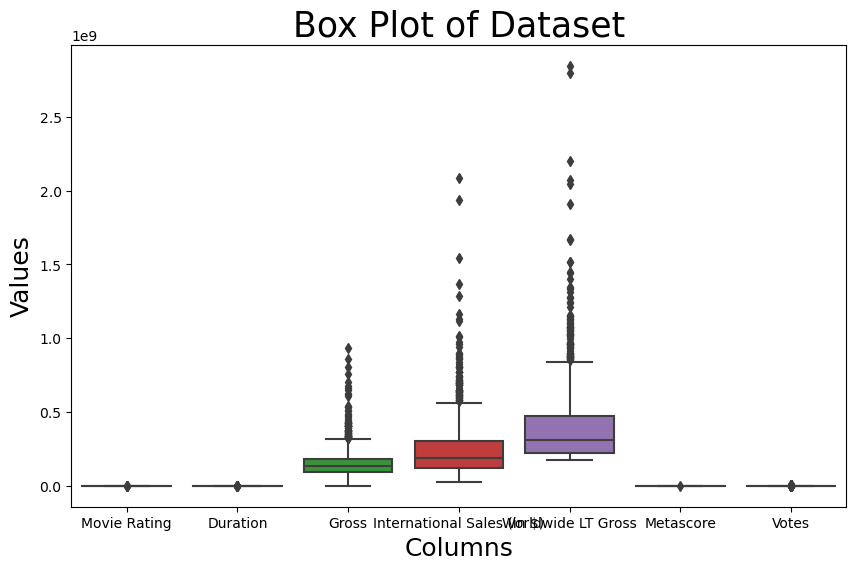

In [105]:
#plotted box plot of the dataset
plt.figure(figsize = (10, 6))
sns.boxplot(data = data)
plt.title('Box Plot of Dataset', size = 25)
plt.xlabel('Columns', size = 18)
plt.ylabel('Values', size = 18)
plt.xticks(rotation = 0)
plt.show()

###### Looking at the figure above, it seems that range of variation are significantly different among the features. This is probably due to outliers and to features with dominant values, which will all be handled in the succeeding parts. To have a clearer view of the box plots, I will be plotting zoomed in figures below.

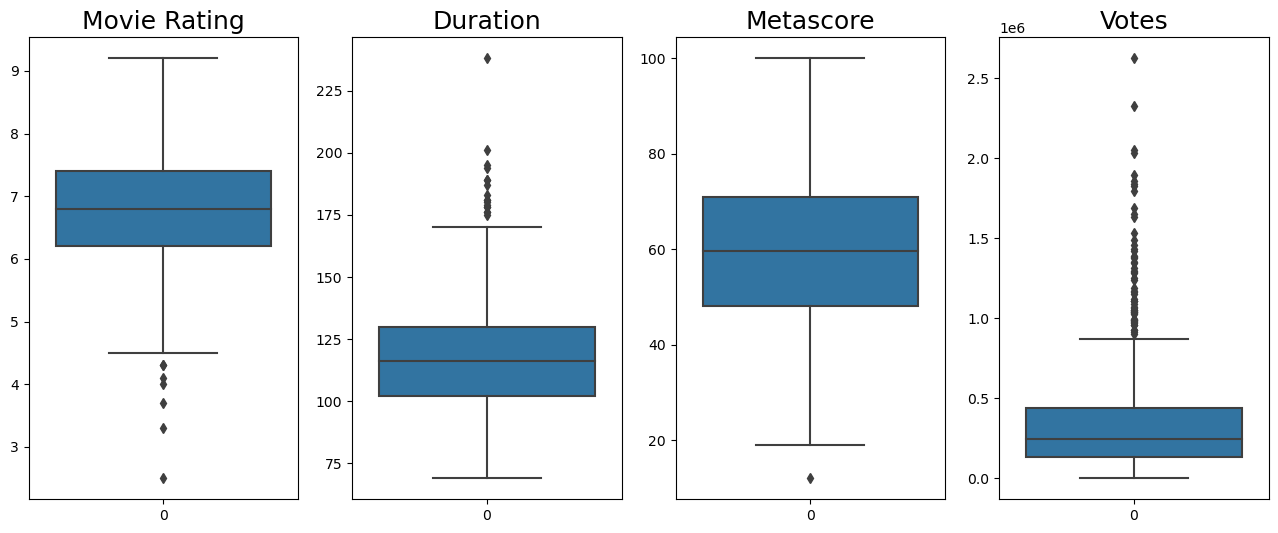

In [106]:
#box plot for Movie Rating, Duration, Metascore, Votes

plt.figure(figsize = (16, 6))

plt.subplot(1, 4, 1)
plt.title('Movie Rating', size = 18)
sns.boxplot(data = data['Movie Rating'])

plt.subplot(1, 4, 2)
plt.title('Duration', size = 18)
sns.boxplot(data = data['Duration'])

plt.subplot(1, 4, 3)
plt.title('Metascore', size = 18)
sns.boxplot(data = data['Metascore'])

plt.subplot(1, 4, 4)
plt.title('Votes', size = 18)
sns.boxplot(data = data['Votes'])

plt.show()

###### Given that there are only a few outliers for Movie Rating, Duration and Metascore; and given that these are expected since movies really vary in duration and ratings; these will not be outrightly removed and treated as significant outliers. For the votes however, according to IMdb Ratings FAQs page; "IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Users can update their votes as often as they'd like, but any new vote on the same title will overwrite the previous one, so it is one vote per title per user." Because of this, though based on the box plot, it seems that votes have a lot of outliers, I will not outrightly remove said outliers. I will first have to check how they will be treated post-transformation, considering that the values of this feature reach up to millions and may be a dominating feature. With this said, this dataset should be transformed.

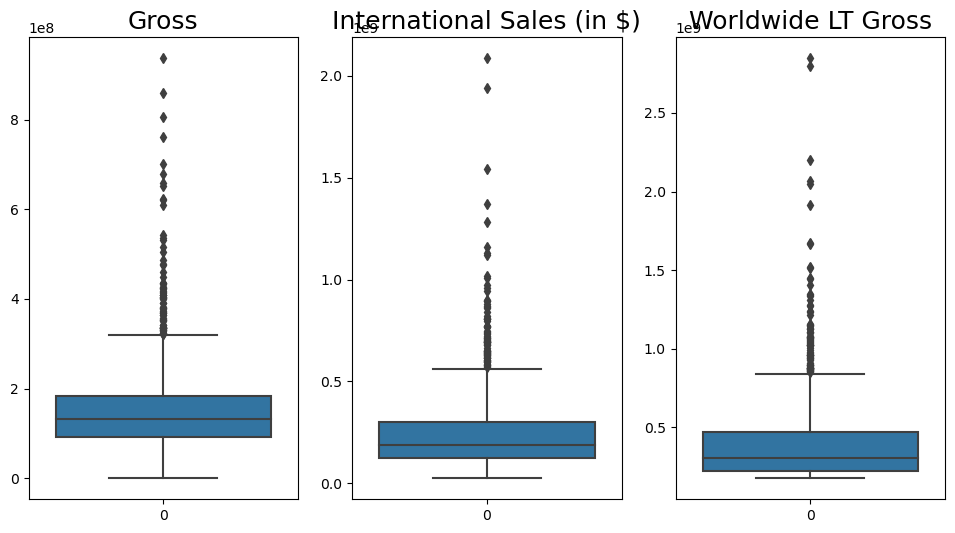

In [107]:
#box plot for Gross Local Sales, International Sales, World Sales

plt.figure(figsize = (16, 6))

plt.subplot(1, 4, 1)
plt.title('Gross', size = 18)
sns.boxplot(data = data['Gross'])

plt.subplot(1, 4, 2)
plt.title('International Sales (in $)', size = 18)
sns.boxplot(data = data['International Sales (in $)'])

plt.subplot(1, 4, 3)
plt.title('Worldwide LT Gross', size = 18)
sns.boxplot(data = data['Worldwide LT Gross'])

plt.show()

###### Though based on the box plot, similar to the votes feature, it seems that these have a lot of outliers, I will not outrightly remove said outliers. I will first have to check how they will be treated post-transformation, considering that the values of this feature are monetary in nature, hence, these are expected to reach up to millions and as a result, are considered dominating features. With this said, this dataset should be transformed.

# Chapter 2: Data Analysis

## 2.1 Distribution check

###### Prior to any transformation, I will first conduct preliminary analysis on the dataset's distribution, and features to learn more about the dataset and be able to verify that there are in fact dominant features in need of handling.

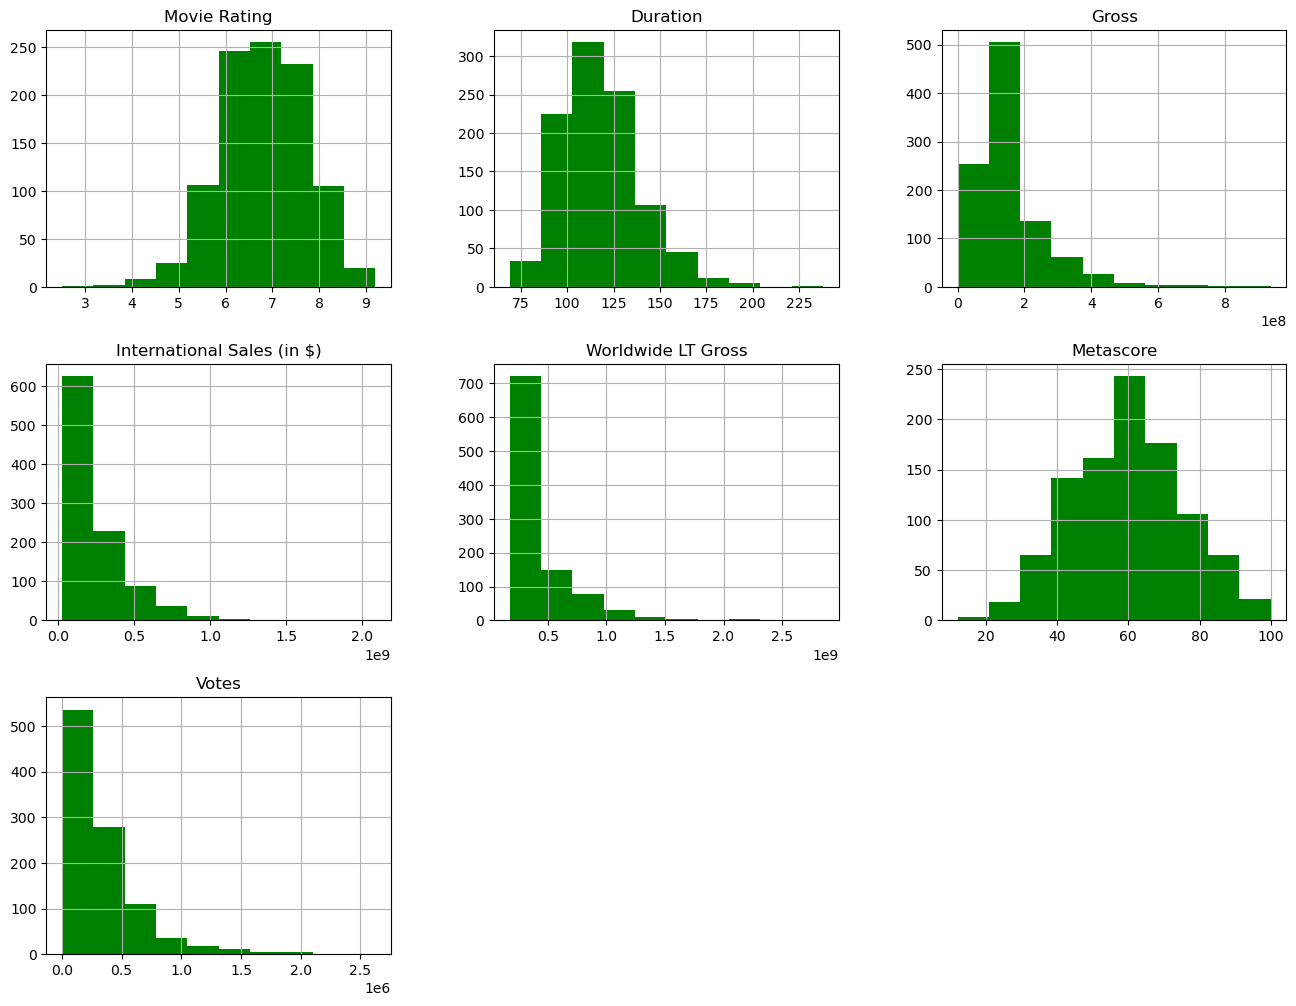

In [108]:
#Plotted histograms for the dataset

data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

###### From the figure above, it can be verified that some values are extremely large when compared against the values of the other features. In this case, these features will dominate the other measures and will render them insignificant when these features are collectively used in a model for data analysis. With this main reason, it will be best if the dataset will be normalized. Moreover, looking at the histograms above, it can be seen that not all features follow a normal distribution, and because of this, normalization is adviseable.

## 2.2 Data Transformation

###### In the succeeding parts, I will be trying out some transformation methods to normalize the dataset. It is important to note that I will not be transforming all features. I will only be transforming continous numerical values as it is unnecessary to transform categorical values. With these said, I will only be transforming the following features:

        1. 'Movie Rating' 
        2. 'Duration' 
        3. 'Gross'
        4. 'International Sales (in $)'
        5. 'Worldwide LT Gross' 
        6. 'Metascore' 
        7. 'Votes' 


###### For the succeeding parts, I will be applying 1) Z-score normalization; 2) log normalization; 3) square root normalization. After these, I will determine which among these methods were able to best normalize the dataset, and I will be using that normalized data for the succeeding parts of the analysis.¶

In [109]:
#checked descriptives

data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,6.80080,117.679000,1.561590e+08,2.536836e+08,4.105976e+08,59.644191,3.393784e+05
std,0.90145,21.561885,1.087307e+08,2.101695e+08,2.951927e+08,15.656950,3.231349e+05
min,2.50000,69.000000,1.000000e+04,2.450000e+07,1.766002e+08,12.000000,3.960000e+02
25%,6.20000,102.000000,9.312500e+07,1.220320e+08,2.220363e+08,48.000000,1.347940e+05
50%,6.80000,116.000000,1.320900e+08,1.874649e+08,3.084121e+08,59.644191,2.448125e+05
75%,7.40000,130.000000,1.837075e+08,3.009530e+08,4.733442e+08,71.000000,4.410002e+05
max,9.20000,238.000000,9.366600e+08,2.086739e+09,2.847397e+09,100.000000,2.622926e+06


In [110]:
#checked glimpse of data

data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,Fantasy,7.8,162,760510000.0,2.086739e+09,2847397339,83.0,1236962,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,Drama,8.4,181,858370000.0,1.939128e+09,2797501328,78.0,1108641,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,Romance,7.9,194,659330000.0,1.542283e+09,2201647264,75.0,1162142,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,Sci-Fi,7.8,138,936660000.0,1.132859e+09,2069521700,80.0,925551,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,Sci-Fi,8.4,149,678820000.0,1.369544e+09,2048359754,68.0,1062517,Walt Disney Studios Motion Pictures,unknown,unknown


In [111]:
#created dataframe copies for each normalization method

zscore_data = data.copy()

log_data = data.copy()

sqrt_data = data.copy()

### 2.2.1 Z-Score Normalization

In [112]:
#imported zscore
from scipy.stats import zscore

In [113]:
#applied zscores to all features to be normalized
zscore_data['Movie Rating'] = zscore(zscore_data['Movie Rating'])

zscore_data['Duration'] = zscore(zscore_data['Duration'])

zscore_data['Gross'] = zscore(zscore_data['Gross'])

zscore_data['International Sales (in $)'] = zscore(zscore_data['International Sales (in $)'])

zscore_data['Worldwide LT Gross'] = zscore(zscore_data['Worldwide LT Gross'])

zscore_data['Metascore'] = zscore(zscore_data['Metascore'])

zscore_data['Votes'] = zscore(zscore_data['Votes'])

In [114]:
#checked changes in descriptives
zscore_data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.455933e-15,-3.544040e-17,-4.385381e-16,1.667555e-16,7.517320e-16,-2.251532e-16,-3.894662e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.773368e+00,-2.258771e+00,-1.436826e+00,-1.091016e+00,-7.930903e-01,-3.044528e+00,-1.049568e+00
25%,-6.668153e-01,-7.275266e-01,-5.800155e-01,-6.267203e-01,-6.390932e-01,-7.440796e-01,-6.334407e-01
50%,-8.879032e-04,-7.790785e-02,-2.214739e-01,-3.152308e-01,-3.463387e-01,0.000000e+00,-2.927980e-01
75%,6.650395e-01,5.717109e-01,2.534914e-01,2.250236e-01,2.126677e-01,7.256516e-01,3.146446e-01
max,2.662822e+00,5.583056e+00,7.181884e+00,8.726160e+00,8.259076e+00,2.578791e+00,7.070391e+00


In [115]:
#got glimpse of data

zscore_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,Fantasy,1.108991,2.056554,5.561017,8.726160,8.259076,1.492468,2.779126,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,Drama,1.774919,2.938179,6.461489,8.023469,8.089962,1.172961,2.381815,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,Romance,1.219979,3.541397,4.629995,6.134310,6.070427,0.981257,2.547466,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,Sci-Fi,1.108991,0.942922,7.181884,4.185269,5.622612,1.300764,1.814926,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,Sci-Fi,1.774919,1.453336,4.809335,5.311995,5.550888,0.533948,2.239004,Walt Disney Studios Motion Pictures,unknown,unknown


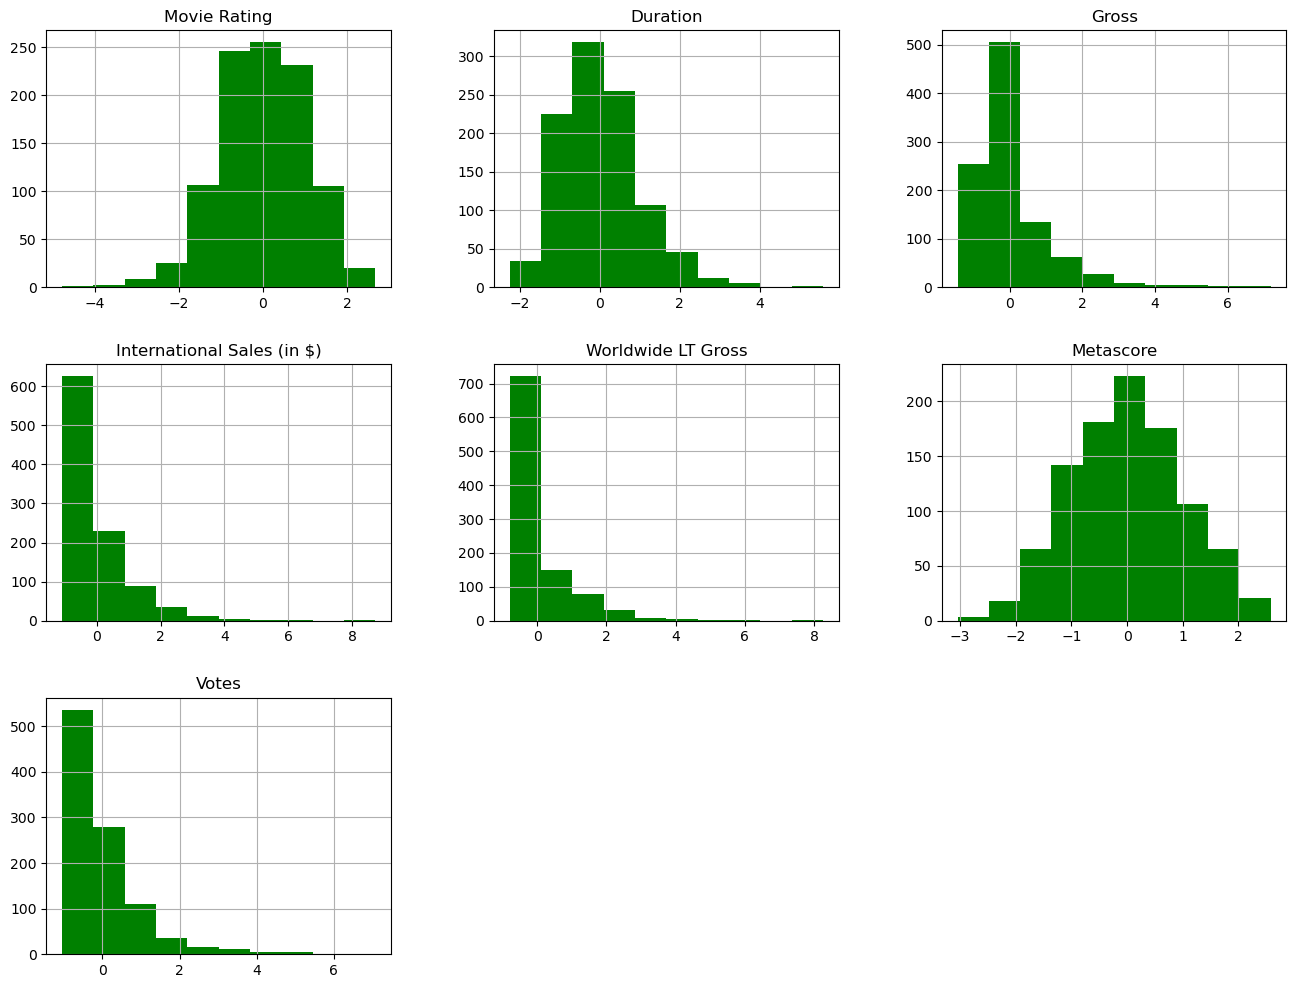

In [116]:
#plotted histogram to see if normalization improved
zscore_data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

###### Normalization improved and the range of values have now been smaller for the dominant features (Sales and Votes). However, as mentioned earlier, I have to check the other normalization methods first to determine which works best.

### 2.2.2 Log Normalization

In [117]:
#applied log transformations to all features to be normalized
log_data['Movie Rating'] = np.log(log_data['Movie Rating'])

log_data['Duration'] = np.log(log_data['Duration'])

log_data['Gross'] = np.log(log_data['Gross'])

log_data['International Sales (in $)'] = np.log(log_data['International Sales (in $)'])

log_data['Worldwide LT Gross'] = np.log(log_data['Worldwide LT Gross'])

log_data['Metascore'] = np.log(log_data['Metascore'])

log_data['Votes'] = np.log(log_data['Votes'])

In [118]:
#checked descriptives to see changes
log_data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.907705,4.751920,18.541081,19.105713,19.664305,4.050627,12.228252
std,0.139513,0.177936,1.189431,0.682123,0.538843,0.284460,1.309524
min,0.916291,4.234107,9.210340,17.014184,18.989399,2.484907,5.981414
25%,1.824549,4.624973,18.349453,18.619794,19.218351,3.871201,11.811503
50%,1.916923,4.753590,18.698994,19.049102,19.546944,4.088397,12.408248
75%,2.001480,4.867534,19.028855,19.522465,19.975333,4.262680,12.996801
max,2.219203,5.472271,20.657831,21.458868,21.769671,4.605170,14.779801


In [119]:
#got a glimpse of the log transformed data
log_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,Fantasy,2.054124,5.087596,20.449500,21.458868,21.769671,4.418841,14.028169,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,Drama,2.128232,5.198497,20.570546,21.385504,21.751992,4.356709,13.918645,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,Romance,2.066863,5.267858,20.306735,21.156530,21.512472,4.317488,13.965775,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,Sci-Fi,2.054124,4.927254,20.657831,20.848011,21.450583,4.382027,13.738145,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,Sci-Fi,2.128232,5.003946,20.335867,21.037744,21.440305,4.219508,13.876151,Walt Disney Studios Motion Pictures,unknown,unknown


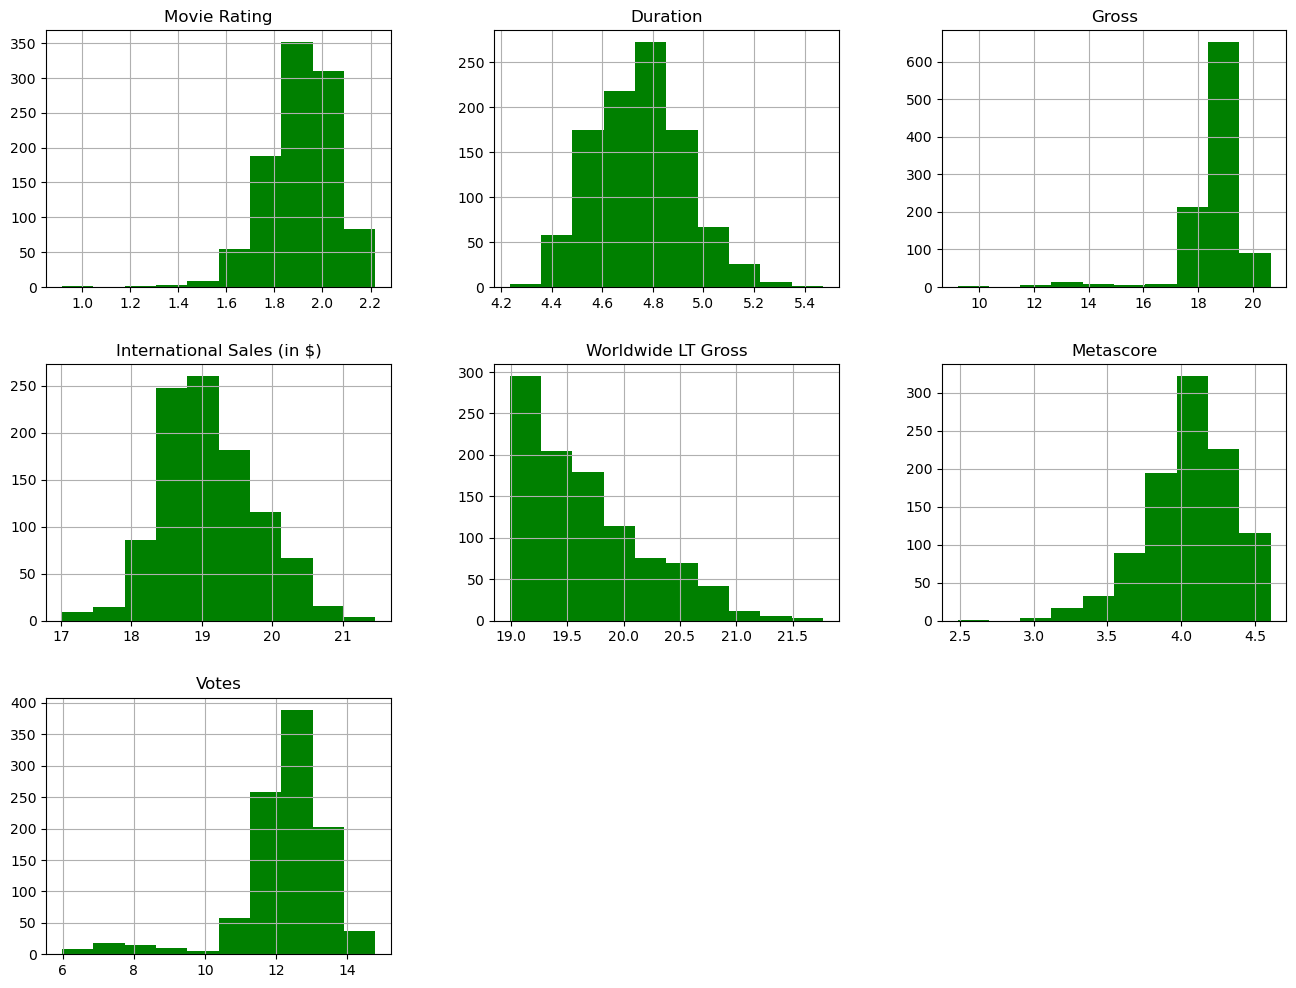

In [120]:
#plotted histogram to see if normalization improved
log_data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

###### It seems that the log transformed data has improved more features than the z-score transformed data. However, in the process of significantly improving some features, it turned some features to be a little bit left-skewed. Next, the square root transformed data will also be evaluated

### 2.2.3 Square Root Normalization

In [121]:
#applied square root transformations to all features to be normalized
sqrt_data['Movie Rating'] = np.sqrt(sqrt_data['Movie Rating'])

sqrt_data['Duration'] = np.sqrt(sqrt_data['Duration'])

sqrt_data['Gross'] = np.sqrt(sqrt_data['Gross'])

sqrt_data['International Sales (in $)'] = np.sqrt(sqrt_data['International Sales (in $)'])

sqrt_data['Worldwide LT Gross'] = np.sqrt(sqrt_data['Worldwide LT Gross'])

sqrt_data['Metascore'] = np.sqrt(sqrt_data['Metascore'])

sqrt_data['Votes'] = np.sqrt(sqrt_data['Votes'])

In [122]:
#checked descriptives to see changes

sqrt_data.describe()

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.601874,10.804276,11796.004419,14953.821472,19368.649454,7.652800,526.938998
std,0.176299,0.973433,4126.776610,5486.067251,5957.223854,1.039193,248.546777
min,1.581139,8.306624,100.000000,4949.747468,13289.101061,3.464102,19.899749
25%,2.489980,10.099505,9650.129272,11046.811029,14900.881398,6.928203,367.143008
50%,2.607681,10.770330,11493.041373,13691.781128,17561.649010,7.722965,494.785302
75%,2.720294,11.401754,13553.873487,17347.998119,21756.472702,8.426150,664.078497
max,3.033150,15.427249,30604.901568,45680.833815,53361.009539,10.000000,1619.544998


In [123]:
#got glimpse of the square root transformed data

sqrt_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License
0,avatar,2009,Fantasy,2.792848,12.727922,27577.345775,45680.833815,53361.009539,9.110434,1112.187934,Twentieth Century Fox,December,PG-13
1,avengers: endgame,2019,Drama,2.898275,13.453624,29297.952147,44035.534833,52891.410720,8.831761,1052.920225,Walt Disney Studios Motion Pictures,April,PG-13
2,titanic,1997,Romance,2.810694,13.928388,25677.421989,39271.915156,46921.714206,8.660254,1078.026901,Paramount Pictures,December,PG-13
3,star wars: episode vii - the force awakens,2015,Sci-Fi,2.792848,11.747340,30604.901568,33657.977880,45491.995999,8.944272,962.055612,Walt Disney Studios Motion Pictures,December,PG-13
4,avengers: infinity war,2018,Sci-Fi,2.898275,12.206556,26054.174330,37007.354296,45258.808579,8.246211,1030.784653,Walt Disney Studios Motion Pictures,unknown,unknown


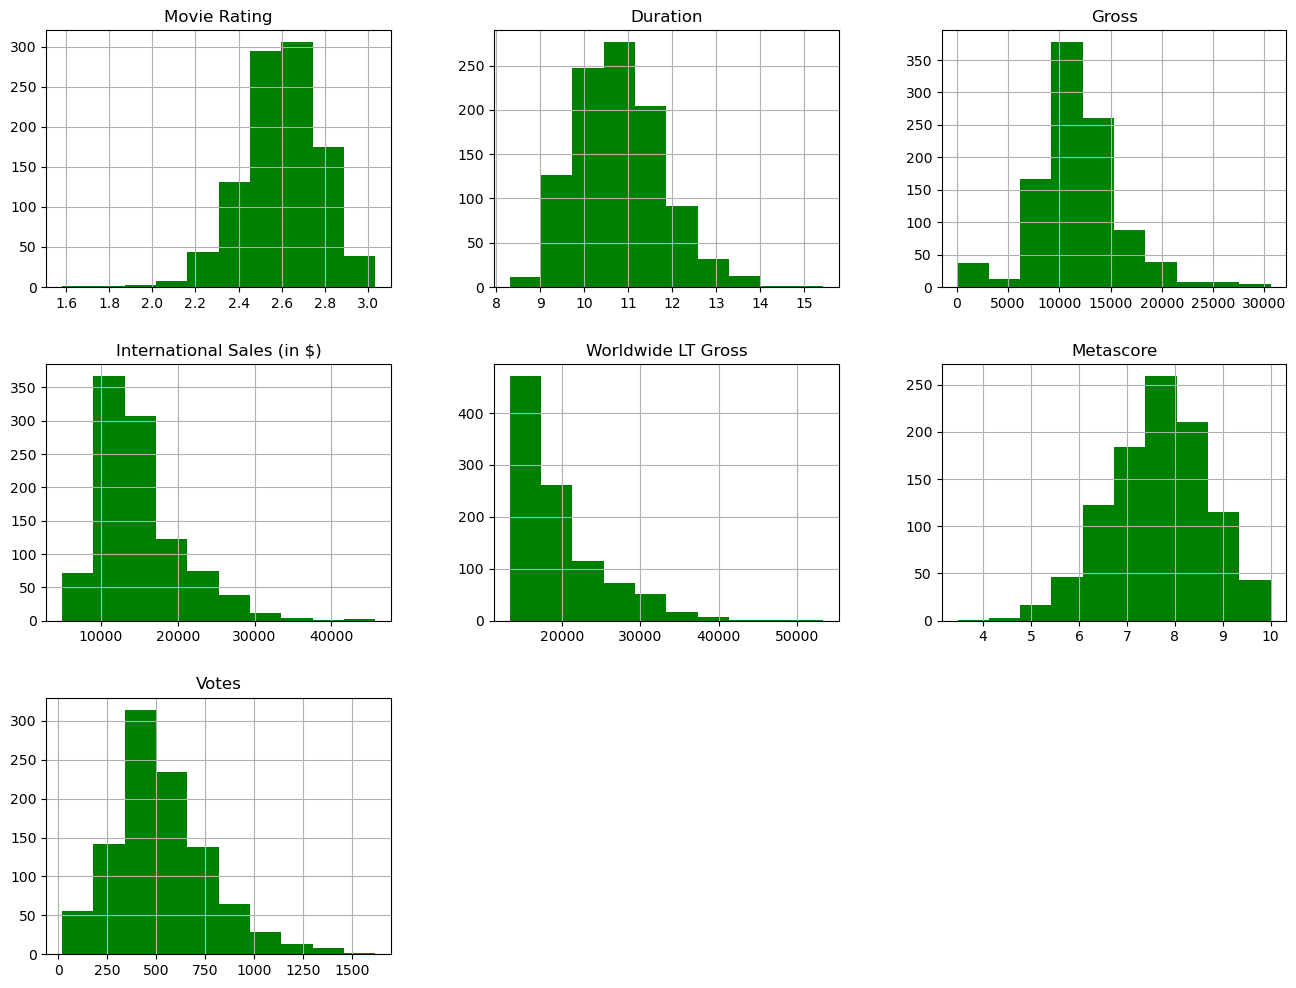

In [124]:
#plotted histogram to see if normalization improved
sqrt_data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

###### Given that the log transformed and sqrt transformed data were able to normalize more features significantly, and given that the z-score transformation converted a lot of data values into negative values; the z-score transformed data will not be used for this analysis.



###### Comparing the sqrt and log transformed data, both transformation methods performed well and show only little difference to most features. The only features with significant differences are: International Sales, Gross, Metascore, and Votes. For International Sales, it would seem that the log transformed data has a more symmetrical distribution. However, for Local Sales, Metascore and Votes; sqaure root transformed data were able to produce more symmetrical distributions, not to mention that the log transformed data left a long left tail for the votes feature. For these reasons, moving forward, I will be using the square root transformed data.

## 2.3 Feature Analysis

###### For this section, I will not be discussing all of the 13 features; rather, I will focus more on the non-numerical features which were excluded from the histogram. WIth this said, I will be closely examining the following:

            1. Year
            2. Genre
            3. Distributor
            4. Month
            5. License

### 2.3.1 Year

In [125]:
# counted the number of times each unique value of 'Year' appears in the dataset
year_counts = data['Year'].value_counts().reset_index(name = 'count').sort_values("index", ascending = True)
year_counts

,index,count
53,1937,1
42,1939,1
48,1942,1
50,1961,1
52,1967,1
49,1972,1
43,1973,1
45,1975,1
39,1977,3
38,1978,3


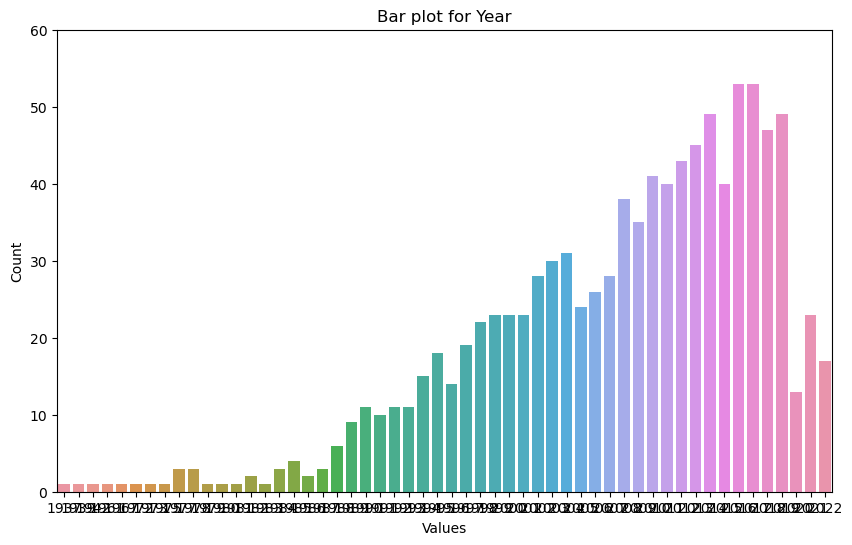

In [126]:
# created bar graph
plt.figure(figsize = (10, 6))
sns.barplot(x='index', y = 'count', data = year_counts)
plt.title('Bar plot for Year')
plt.xlabel('Values')
plt.ylabel('Count')
plt.ylim(0, 60)
plt.show()

###### It can be seen that throughout the years, the number of movies that became part of the highest grossing movies have an upward trend. This could mean that the film industry is continously growing; it just had a decline starting from year 2020 probably because of the Covid-19 outbreak which became a very challenging time for film makers.

### 2.3.2 Genre

In [127]:
# counted the number of times each unique value of Genre appears in the dataset
genre_counts = data['Genre_x'].value_counts().reset_index(name = 'count').sort_values("count", ascending = False)
genre_counts

,index,count
0,Comedy,189
1,Sci-Fi,144
2,Thriller,141
3,Drama,106
4,Fantasy,103
5,Romance,89
6,Family,55
7,Crime,43
8,Adventure,34
9,Mystery,25


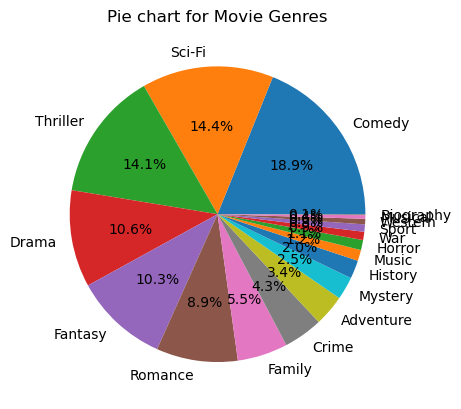

In [128]:
#created bar graph
plt.pie(genre_counts['count'], labels=genre_counts['index'], autopct='%1.1f%%')
plt.title('Pie chart for Movie Genres')
plt.show()

###### It can be seen that Comedy films own the largest slice of the pie followed by Sci-Fi and Thriller.

### 2.3.3 Distributor

In [129]:
# count the number of times each unique value of 'Distributor' appears in the dataset
distributor_counts = pre_data['Distributor'].value_counts().reset_index(name = 'count').sort_values("count", ascending = False)

distributor_counts

,index,count
0,unknown,252
1,Warner Bros.,134
2,Walt Disney Studios Motion Pictures,126
3,Twentieth Century Fox,102
4,Universal Pictures,100
5,Sony Pictures Entertainment (SPE),83
6,Paramount Pictures,75
7,DreamWorks,18
8,DreamWorks Distribution,15
9,Lionsgate,15


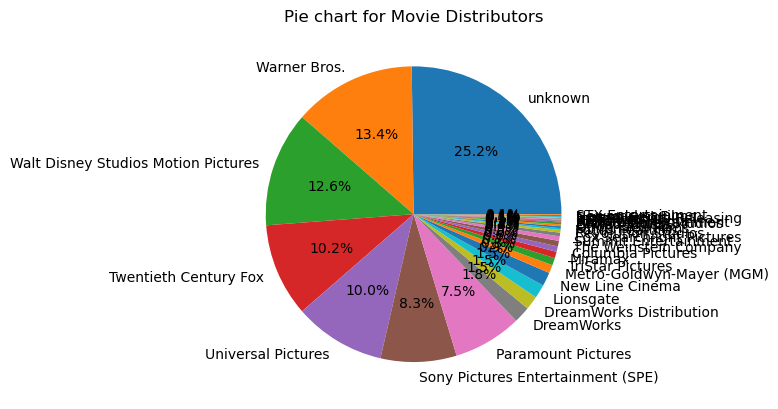

In [130]:
#created bar graph
plt.pie(distributor_counts['count'], labels=distributor_counts['index'], autopct='%1.1f%%')
plt.title('Pie chart for Movie Distributors')
plt.show()

###### From the pie chart, it can be seen that the biggest players in the movie making business are: Warner Bros, Walt Disney, 20th Century Fox, and Universal Picures.

### 2.3.4 Month

In [131]:
# counted the number of times each unique value of 'Month' appears in the dataset
month_counts = data['Month'].value_counts().reset_index(name = 'count').sort_values("count", ascending = False)

#defined the desired order of months
desired_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                 'November', 'December','unknown']

# created a categorical data type with the desired order
cat_dtype = pd.CategoricalDtype(categories=desired_order, ordered=True)

# converted the 'index' column to the categorical data type
month_counts['index'] = month_counts['index'].astype(cat_dtype)

# sorted the DataFrame by the 'index' column
month_counts = month_counts.sort_values('index')

month_counts

,index,count
12,January,12
9,February,33
6,March,47
10,April,28
3,May,86
1,June,109
4,July,82
8,August,34
11,September,27
7,October,38


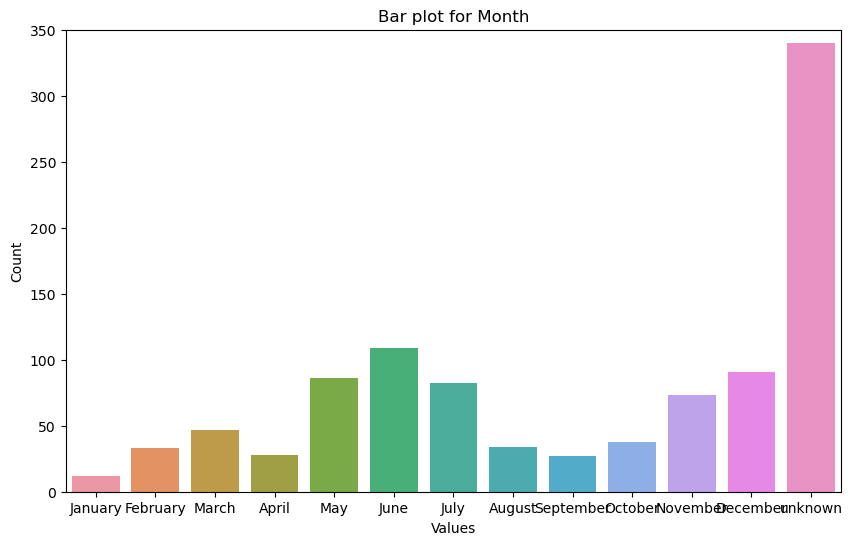

In [132]:
# created bar graph
plt.figure(figsize = (10, 6))
sns.barplot(x='index', y = 'count', data = month_counts)
plt.title('Bar plot for Month')
plt.xlabel('Values')
plt.ylabel('Count')
plt.ylim(0, 350)
plt.show()

###### From the bar graph, it can be seen that most movies that are part of the highest grossing movies were released in May- July (June being the highest), December, and November. From January, the count will gradually increase and will peak at June. Then, it will gradually decrease until October where it will gradually increase again.

### 2.3.5 License

In [133]:
# count the number of times each unique value of 'License' appears in the dataset
license_counts = data['License'].value_counts().reset_index(name = 'count').sort_values("count", ascending = False)

license_counts

,index,count
0,unknown,383
1,PG-13,312
2,PG,147
3,R,147
4,G,11


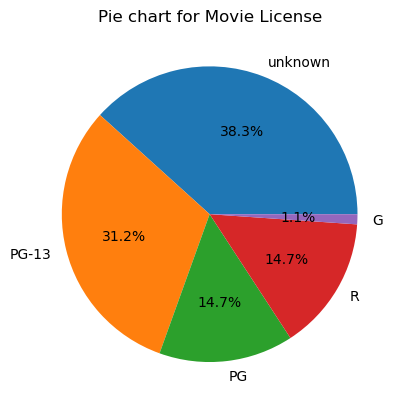

In [134]:
#created bar graph
plt.pie(license_counts['count'], labels=license_counts['index'], autopct='%1.1f%%')
plt.title('Pie chart for Movie License')
plt.show()

###### PG-13 and PG dominate the pie chart for the Movie Licenses

###### These findings will help me decide which categorical features are important for the relationship analysis and data modelling.

## 2.4 Relationship Analysis

###### Since the main goal of this analysis portfolio is to be able to recommend a model that will help predict the financial success of a movie, relationships of features with the Movie Sales will be assessed.

In [135]:
#got correlation matrix of the data

corr = sqrt_data.corr()

corr

,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
Movie Rating,1.000000,0.349249,0.298305,0.186231,0.255533,0.744012,0.652130
Duration,0.349249,1.000000,0.162379,0.283641,0.280206,0.242334,0.375948
Gross,0.298305,0.162379,1.000000,0.493407,0.737128,0.248922,0.555980
International Sales (in $),0.186231,0.283641,0.493407,1.000000,0.942006,0.139099,0.351544
Worldwide LT Gross,0.255533,0.280206,0.737128,0.942006,1.000000,0.209439,0.457146
Metascore,0.744012,0.242334,0.248922,0.139099,0.209439,1.000000,0.431028
Votes,0.652130,0.375948,0.555980,0.351544,0.457146,0.431028,1.000000


[Text(0.5, 0, 'Movie Rating'),
 Text(1.5, 0, 'Duration'),
 Text(2.5, 0, 'Gross'),
 Text(3.5, 0, 'International Sales (in $)'),
 Text(4.5, 0, 'Worldwide LT Gross'),
 Text(5.5, 0, 'Metascore'),
 Text(6.5, 0, 'Votes')]

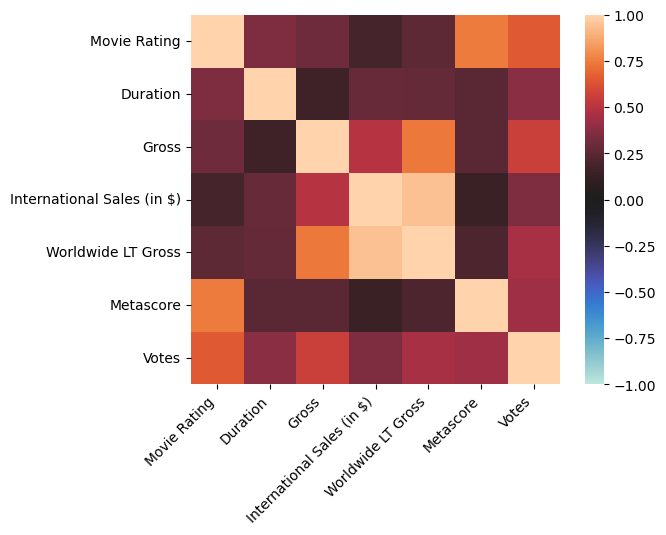

In [136]:
# Plotted Heatmap


heat = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
heat.set_xticklabels(heat.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

###### Basing on the correlation matrix and the heatmap, only Votes seem to have a relatively high correlation with Movie Sales. Because of this, despite the other features having low correlations with Movie sales; I will be retaining Movie Rating and Metascore for now, because these two have high correlations with Votes.

## 2.5 Categorical Features Evaluation

###### Since the relationship analysis above only involved numerical features, for this section I will also be evaluating the categorical features, and specifically, decide which features will be given dummies and be evaluated as features for the model to be created.

'Movie title' - This is not needed since this is only the title. 

'Year' - Since yearly there are a considerable amount of movies being produced,and only major events such as outbreaks, wars, etc greatly decreased the movies produced; these will not be applied with the get dummies function. However, as seen from the bar graph of 'Year' earlier, it had a steady increase of number of films entering the highest grossing films of all time, which seem to indicate that as years go by, films become more profitable in general. Because of this reason, the year feature will be further evaluated; but instead of applying the get dummies, this will be converted into numeric type and its correlation will also be evaluated against the other features.

'Distributor' - Since there are a lot of distributors, these may dominate the models, and since the goal of this portfolio is to be able to predict which movies will be successful; knowing which distributors have high chances of producing high grossing movies is not that relevant as of now. Because of these reasons, the 'Distributor' feature will not be applied with the give dummies function.

The following features will be applied with the give dummies feature and will consequently, be analyzed afterwards:
1. Genre_x - as seen from the pie chart earlier, it gave us insights on the most dominant genres from the top grossing dataset
2. Month - as seen from the bar graph earlier, it gave is insights that there are months that have a lot of top-grossing movies, holiday seasons,etc
3. License - since licenses prohibit certain viewers based on age, this may affect the success of a film financially; and as seen from the pie chart earlier, majority of movies licensed PG-13 and PG dominated the highest grossing films dataset.




In [137]:
# converted 'Year' columns to numeric
sqrt_data['Year'] = pd.to_numeric(sqrt_data['Year'], errors='coerce')


#checked that conversion to numeric was successful
sqrt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movie Title                 1000 non-null   object 
 1   Year                        1000 non-null   int64  
 2   Genre_x                     1000 non-null   object 
 3   Movie Rating                1000 non-null   float64
 4   Duration                    1000 non-null   float64
 5   Gross                       1000 non-null   float64
 6   International Sales (in $)  1000 non-null   float64
 7   Worldwide LT Gross          1000 non-null   float64
 8   Metascore                   1000 non-null   float64
 9   Votes                       1000 non-null   float64
 10  Distributor                 1000 non-null   object 
 11  Month                       1000 non-null   object 
 12  License                     1000 non-null   object 
dtypes: float64(7), int64(1), object(5)

In [138]:
#applied the get dummies method for Genre
data_genre = pd.get_dummies(sqrt_data['Genre_x'])
with_genre_dummy = pd.concat((sqrt_data.iloc[:,0], data_genre, sqrt_data.iloc[:,1:]), axis=1)

#checked that dummies have been applied
with_genre_dummy.columns

Index(['Movie Title', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Year',
       'Genre_x', 'Movie Rating', 'Duration', 'Gross',
       'International Sales (in $)', 'Worldwide LT Gross', 'Metascore',
       'Votes', 'Distributor', 'Month', 'License'],
      dtype='object')

In [139]:
#applied the get dummies method for Month
data_month = pd.get_dummies(with_genre_dummy['Month'])
with_month_dummy = pd.concat((with_genre_dummy.iloc[:,0], data_month, with_genre_dummy.iloc[:,1:]), axis=1)

#checked that dummies have been applied
with_month_dummy.columns

Index(['Movie Title', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'unknown', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Year',
       'Genre_x', 'Movie Rating', 'Duration', 'Gross',
       'International Sales (in $)', 'Worldwide LT Gross', 'Metascore',
       'Votes', 'Distributor', 'Month', 'License'],
      dtype='object')

In [140]:
#applied the get dummies method for License
data_license = pd.get_dummies(with_month_dummy['License'])
with_license_dummy = pd.concat((with_month_dummy.iloc[:,0], data_license, with_month_dummy.iloc[:,1:]), axis=1)

#checked that dummies have been applied
with_license_dummy.columns

Index(['Movie Title', 'G', 'PG', 'PG-13', 'R', 'unknown', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'unknown', 'Adventure', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'Year', 'Genre_x', 'Movie Rating', 'Duration',
       'Gross', 'International Sales (in $)', 'Worldwide LT Gross',
       'Metascore', 'Votes', 'Distributor', 'Month', 'License'],
      dtype='object')

In [141]:
#changed setting to allow the display of all columns
pd.set_option('display.max_columns', None)

#got correlation matrix with the dummies

corr_dummies = with_license_dummy.corr()

corr_dummies

,G,PG,PG-13,R,unknown,April,August,December,February,January,July,June,March,May,November,October,September,unknown,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
G,1.000000,-0.043781,-0.071020,-0.043781,-0.083091,-0.017900,-0.019786,-0.000033,-0.019482,-0.011623,-0.031520,0.116937,0.021881,-0.032350,0.044116,0.079329,-0.017568,-0.075695,-0.019786,-0.003337,0.169486,-0.022355,-0.005170,0.016611,-0.035737,-0.015066,-0.011122,-0.011623,-0.006683,-0.016888,-0.032964,-0.043256,-0.009471,-0.042728,-0.010050,-0.008194,0.000257,-0.011746,-0.111562,0.059317,0.052303,0.058574,0.037400,-0.011422
PG,-0.043781,1.000000,-0.279555,-0.172333,-0.327070,0.015132,-0.046717,0.104306,0.033973,0.083928,-0.000556,0.036039,0.121306,0.094260,0.089767,0.020885,0.070233,-0.297956,0.218187,-0.013134,0.239599,-0.060153,-0.078729,0.184754,0.054435,-0.039133,-0.043781,-0.045751,0.018433,-0.048386,-0.050412,-0.146136,-0.037280,-0.168189,-0.039561,-0.032253,0.038907,-0.041897,-0.262714,0.162802,0.086052,0.127805,-0.007263,-0.083656
PG-13,-0.071020,-0.279555,1.000000,-0.279555,-0.530567,0.186620,0.111856,0.094618,0.032671,0.024897,0.160609,0.131537,-0.016970,0.124469,0.051641,0.058070,0.007670,-0.483338,-0.078699,-0.021306,-0.181752,0.038133,0.006507,-0.143526,0.034539,-0.034534,-0.050327,0.044720,-0.008480,-0.011060,0.047239,0.264792,0.060668,0.000050,-0.064175,0.003577,0.061342,-0.006516,0.186022,0.290321,0.156379,0.220959,-0.056466,0.267005
R,-0.043781,-0.172333,-0.279555,1.000000,-0.327070,-0.070458,0.109109,0.055212,0.113017,0.006121,0.081788,0.017915,0.081276,0.043897,0.013776,0.094736,0.105079,-0.297956,-0.077882,-0.013134,-0.077779,0.065137,0.022182,-0.100150,-0.122090,0.061725,0.064520,-0.019815,0.018433,0.132496,0.028930,-0.089831,-0.037280,0.180734,0.139854,0.004315,-0.015710,0.133750,0.123094,-0.014109,-0.140004,-0.121442,0.112325,0.187956
unknown,-0.083091,-0.327070,-0.530567,-0.327070,1.000000,-0.133722,-0.147811,-0.206370,-0.134030,-0.086830,-0.205483,-0.189757,-0.136089,-0.212327,-0.134109,-0.156589,-0.131245,0.910984,-0.022952,0.040157,0.018984,-0.035178,0.036099,0.071599,0.024032,0.019690,0.035244,0.007633,-0.017338,-0.047104,-0.022302,-0.071201,-0.001478,-0.000018,-0.009737,0.018699,-0.075416,-0.058178,-0.051653,-0.397740,-0.120964,-0.227794,-0.030739,-0.328002
April,-0.017900,0.015132,0.186620,-0.070458,-0.133722,1.000000,-0.031842,-0.053701,-0.031354,-0.018705,-0.050726,-0.059364,-0.037692,-0.052062,-0.047629,-0.033733,-0.028273,-0.121819,-0.031842,-0.005370,0.010962,-0.035977,-0.038752,-0.014358,-0.017629,-0.024246,-0.017900,-0.018705,-0.010756,-0.027178,0.032102,0.103038,-0.015242,0.000906,-0.016174,-0.013186,0.052429,0.018956,0.004497,0.134280,0.126778,0.145314,0.015137,0.077447
August,-0.019786,-0.046717,0.111856,0.109109,-0.147811,-0.031842,1.000000,-0.059359,-0.034657,-0.020676,-0.056071,-0.065618,-0.041663,-0.057548,-0.052647,-0.037287,-0.031252,-0.134654,-0.035197,-0.005936,-0.034192,0.069036,0.025023,-0.045260,-0.045420,0.012612,-0.019786,-0.020676,-0.011889,-0.030041,-0.019882,0.001635,-0.016848,0.082541,0.098975,-0.014576,0.020295,0.000925,-0.023588,0.002198,-0.089209,-0.066548,-0.033702,0.018387
December,-0.000033,0.104306,0.094618,0.055212,-0.206370,-0.053701,-0.059359,1.000000,-0.058450,-0.034870,-0.094564,-0.110666,-0.070265,-0.097054,-0.088789,-0.062884,-0.052707,-0.227094,-0.040174,-0.010011,-0.072814,0.018631,0.094356,0.045677,-0.038583,0.054141,-0.033369,0.028994,0.035034,-0.028395,0.120899,-0.060450,0.010616,-0.058255,0.006664,0.065463,-0.048376,0.111352,0.145601,0.105272,-0.000803,0.031760,0.085944,0.104788
February,-0.019482,0.033973,0.032671,0.113017,-0.134030,-0.031354,-0.034657,-0.058450,1.000000,-0.020359,-0.055211,-0.064613,-0.041025,-0.056666,-0.051840,-0.036715,-0.030773,-0.132590,0.058009,-0.005845,-0.017687,0.043629,-0.045426,-0.0

###### None of the new columns have high correlations with World Sales. Year is relatively the highest.

###### Based on the analysis findings, the features I will be using for the models to predict world sales are: Movie Rating, Metascore and Votes. However, before I proceed to modelling, I will first conduct Recursive Feature Elimination to compare my findings. 

## 2.6 Feature Selection

In [142]:
#imported RFE and linear regression and R2 score
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [143]:
#prepped the inputs for the RFE
#used columns prior the application of get dummies since the get dummies function did not provide columns with high correlations
#dropped the sales columns because these are what this analysis is after
#Used only World Sales since all International and Gross sales are highly and directly correlated with world sales
#dropped non-numerical columns as well

columns_to_drop = ['Movie Title','Genre_x', 'Distributor', 'License', 'Month','Gross','International Sales (in $)', 'Worldwide LT Gross']
feature_cols = np.array(sqrt_data.copy().columns.drop(columns_to_drop))
A = sqrt_data.copy()[feature_cols]
b = sqrt_data.copy()['Worldwide LT Gross']

In [144]:
#Performed RFE
estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select = 3, step =1)  
# selected 3 features because from my analysis findings above, I ended up with 3 features to use
# And the purpose of this exercise is to have some sort of validation for my feature selection analysis

selector = selector.fit(A, b)

supp = selector.get_support() 
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)

Selected features: ['Movie Rating' 'Duration' 'Metascore']
Coeffs: [4752.28118728 1337.32166716  297.20909757]


###### Based on the RFE, it also selected the same set of features I selected namely, 'Movie Rating' and 'Metascore'. The only difference is that it selected 'Duration' instead of 'Votes'.  All in all, the result of this exercise supports the feature selection rationale I conducted during the feature and relationship analysis above. Moving forward, given the results of the analysis and Recursive Feature Elimination exercise, I will proceed to use the following features as inputs: 

        1. Movie Rating - as this was both selected by RFE and feature selection rationale
        2. Metascore - as this was both selected by RFE and feature selection rationale
        3. Votes - despite not being selected by RFE, I am deciding to retain this as this feature had relatively the 
           highest correlation rating with Sales.
        4. Duration - I will also be including duration as based on the RFE, this is also a recommended feature.

# Chapter 3: Data Modelling and Models Evaluation

###### Now that I have been able to select features to be used for the models, I will now begin to create models for this dataset. For the first part of this chapter, I will be creating the baseline model which is Linear Regression model.

## 3.1 Baseline Model: Linear Regression

###### For the Linear Regression model, I will first train and test the model in an 80-20 split. After that, I will evaluate the model's performance.

### 3.1.1 (80-20) Split Training and Testing

In [145]:
#split the data between training and testing data
#set 80% of the data to be used for training while the remaining 20% to be used for the testing data
#set random state to 42
train, test = train_test_split(sqrt_data, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(800, 13)
(200, 13)


In [146]:
#trained the model

lin = linear_model.LinearRegression()

X_train = train[['Movie Rating', 'Duration', 'Metascore', 'Votes']]
y_train = train['Worldwide LT Gross']

X_test = test[['Movie Rating', 'Duration', 'Metascore', 'Votes']]
y_test = test['Worldwide LT Gross']

lin.fit(X_train, y_train)

LinearRegression()

#### 3.1.1.1 Evaluation of the Test Data

In [147]:
#Predicted the value of y_test

test_pred = lin.predict(X_test)

mse_test = ((np.array(y_test)-test_pred)**2).sum()/len(y_test)
r2_test = r2_score(y_test, test_pred)
rmse_test = np.sqrt(mse_test)

print("MSE:", mse_test)
print("R Squared:", r2_test)
print("RMSE:", rmse_test)


MSE: 20925203.898998026
R Squared: 0.25607144128372417
RMSE: 4574.407491577245


###### MSE and RMSE scores are extremely high; and R Squared is far from 1; which indicates that the model is not very accurate.

#### 3.1.1.2 Evaluation of the Training Data

In [148]:
#Predicted the value of y_train

train_pred = lin.predict(X_train)

mse_train = ((np.array(y_train)-train_pred)**2).sum()/len(y_train)
r2_train = r2_score(y_train, train_pred)
rmse_train = np.sqrt(mse_train)

print("MSE:", mse_train)
print("R Squared:", r2_train)
print("RMSE:", rmse_train)


MSE: 28811835.953831874
R Squared: 0.22645116820250355
RMSE: 5367.665782612762


###### Comparing the accuracy scores of the training and test data, it seems that there is no problem of overfitting because the model significantly performs better from the test data. However, the linear regression model created is still far from accurate.

In [149]:
#tested my model by making predictions

#predicted last values of the test data
lin.predict(X_test[190:])

array([18400.3328432 , 19686.93210622, 19254.91166273, 21399.06624087,
       22725.91598841, 16603.19907893, 20813.31637692, 24297.94038738,
       20491.82163275, 23900.18463131])

###### Before I give up on linear regression, I will first check how the data will fare on a polynomial model.

### 3.1 Bonus Round: Polynomial Model

In [150]:
#imported polynomial Fearures

from sklearn.preprocessing import PolynomialFeatures

In [151]:
#set the X and y
X, y = sqrt_data.copy()[['Movie Rating', 'Duration', 'Metascore', 'Votes']], sqrt_data.copy()['Worldwide LT Gross']

#set the variables prior to training
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

#split the data
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

#trained the data
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)


LinearRegression()

In [152]:
#evaluated the model

poly_reg_pred = poly_reg_model.predict(X_test)

mse_poly = ((np.array(y_test)-poly_reg_pred)**2).sum()/len(y_test)
r2_poly = r2_score(y_test, poly_reg_pred)
rmse_poly = np.sqrt(mse_poly)

print("MSE:", mse_poly)
print("R Squared:", r2_poly)
print("RMSE:", rmse_poly)

MSE: 20079421.58927226
R Squared: 0.28614052054809114
RMSE: 4481.006760681383


###### Despite using a polynomial regression model, even though, the MSE, R_squared and RMSE improved; they are still far from providing scores indicative of an accurate model.

#### Turning Point: Given that we are trying to predict exact sales amounts, it is understandable that the model will perform very poorly since there are a vast and diverse set of confounding factors that affect a sale amount down to its very last cent. Therefore, for this case, it will be more realistic and logical if our model predicts a range of values instead of an exact sale amount especially what we're interested in is to determine if a certain movie will be financially successful, range of values will do rather than predicting the exact sale. 

#### WIth this said, for the next part, I will be creating a Logistic Regression model since we will be shifting towards predicting a classification (range of values).

## 3.2 Baseline Model: The Shift to Logistic Regression

In [153]:
#checked descriptives
sqrt_data.describe()

,Year,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2007.611000,2.601874,10.804276,11796.004419,14953.821472,19368.649454,7.652800,526.938998
std,10.398067,0.176299,0.973433,4126.776610,5486.067251,5957.223854,1.039193,248.546777
min,1937.000000,1.581139,8.306624,100.000000,4949.747468,13289.101061,3.464102,19.899749
25%,2002.000000,2.489980,10.099505,9650.129272,11046.811029,14900.881398,6.928203,367.143008
50%,2010.000000,2.607681,10.770330,11493.041373,13691.781128,17561.649010,7.722965,494.785302
75%,2016.000000,2.720294,11.401754,13553.873487,17347.998119,21756.472702,8.426150,664.078497
max,2022.000000,3.033150,15.427249,30604.901568,45680.833815,53361.009539,10.000000,1619.544998


###### For the next part, I will be creating a new column in the dataset entitled, 'sales_range'; this aims to classify if a certain film belongs to the bottom 25%', '25%-50%', '51%-75%',  or top 75%' of the highest grossing films.

In [154]:
# Defined the bin edges for the sales amounts
bins = [0, 14900.881398, 17561.649010, 21756.472702, 60000]

In [155]:
# Used the cut function to bin the sales amounts into categories
sqrt_data['sales_range'] = pd.cut(sqrt_data['Worldwide LT Gross'], bins=bins, labels=['<25%', '25%-50%', '51%-75%', '>75%'])

#checked cut was successful

sqrt_data.head()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License,sales_range
0,avatar,2009,Fantasy,2.792848,12.727922,27577.345775,45680.833815,53361.009539,9.110434,1112.187934,Twentieth Century Fox,December,PG-13,>75%
1,avengers: endgame,2019,Drama,2.898275,13.453624,29297.952147,44035.534833,52891.410720,8.831761,1052.920225,Walt Disney Studios Motion Pictures,April,PG-13,>75%
2,titanic,1997,Romance,2.810694,13.928388,25677.421989,39271.915156,46921.714206,8.660254,1078.026901,Paramount Pictures,December,PG-13,>75%
3,star wars: episode vii - the force awakens,2015,Sci-Fi,2.792848,11.747340,30604.901568,33657.977880,45491.995999,8.944272,962.055612,Walt Disney Studios Motion Pictures,December,PG-13,>75%
4,avengers: infinity war,2018,Sci-Fi,2.898275,12.206556,26054.174330,37007.354296,45258.808579,8.246211,1030.784653,Walt Disney Studios Motion Pictures,unknown,unknown,>75%


###### Since the dataset has been originally sorted by World Sales, I will first randomize the data similar to what was done previously before I proceed to Logistic Regression Modelling

In [156]:
# Randomized the order of rows in the DataFrame
shuffled_data = sqrt_data.sample(frac=1, random_state=42) 

#checked shuffle was successful
shuffled_data.tail()

,Movie Title,Year,Genre_x,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes,Distributor,Month,License,sales_range
106,no time to die,2021,Thriller,2.701851,12.767145,12683.453788,24764.127281,27823.605212,8.246211,626.301046,Metro-Goldwyn-Mayer (MGM),unknown,unknown,>75%
270,ocean's eleven,2001,Thriller,2.774887,10.770330,13543.264008,16349.311912,21230.100094,8.602325,755.816115,Warner Bros.,December,PG-13,51%-75%
860,open season,2006,Comedy,2.469818,9.273618,9225.508116,10756.692335,14170.804106,7.000000,311.281223,Sony Pictures Entertainment (SPE),September,PG,<25%
435,wanted,2008,Thriller,2.588436,10.488088,11597.844627,14420.628003,18505.757564,8.000000,623.939901,Universal Pictures,June,R,51%-75%
102,furious 6,2013,Crime,2.645751,11.401754,15449.271828,23452.102635,28083.464316,7.810250,627.938691,Universal Pictures,May,PG-13,>75%


In [157]:
#Split the data into 90% as the training and validation sets and 10% for the test set 

x_ex1 = shuffled_data.copy()[['Movie Rating', 'Duration', 'Metascore', 'Votes']]
y_ex1 = shuffled_data.copy()['sales_range']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_ex1_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.9),:]
x_ex1_test = x_ex1_array[int((len(y_ex1_array)+1)*0.9):,:]
y_ex1_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.9)]
y_ex1_test = y_ex1_array[int((len(y_ex1_array)+1)*0.9):]

In [158]:
#checked that the split was successful
x_ex1_train.shape

(900, 4)

In [159]:
#checked that the split was successful
x_ex1_test.shape

(100, 4)

In [160]:
#imported logistic Regression
from sklearn.linear_model import LogisticRegression

#defined Logistic Regression
model_log = LogisticRegression()

In [161]:
#trained the model using the training data

log_reg = model_log.fit(x_ex1_train, y_ex1_train)


In [162]:
# used the trained model to make predictions on the test data

y_pred = log_reg.predict(x_ex1_test)

In [163]:
#predicted first 10 values using test data
y_pred[:10]

array(['25%-50%', '<25%', '<25%', '>75%', '>75%', '<25%', '<25%', '>75%',
       '<25%', '<25%'], dtype=object)

### 3.2.1 Training Set Evaluation

In [164]:
#imported confusion matrix
from sklearn.metrics import confusion_matrix

In [165]:
#computed the accuracy score of the logistic regression model on the training set
log_reg.score(x_ex1_train,y_ex1_train) 

0.4166666666666667

In [166]:
#set up predictions for training data for comparison of accuracy tests of training and test set
y_pred_train = log_reg.predict(x_ex1_train)

In [167]:
#For comparison, confusion matrix will also be done on training set

confusion_matrix(y_ex1_train, y_pred_train)

array([[ 60,  36,  91,  41],
       [ 37,  35,  74,  74],
       [ 42,  23, 140,  23],
       [ 32,  23,  29, 140]], dtype=int64)

In [168]:
#imported unique labels to make confusion matrix easier to read

from sklearn.utils.multiclass import unique_labels
unique_labels(y_ex1_train)

array(['25%-50%', '51%-75%', '<25%', '>75%'], dtype='<U7')

In [169]:
#defined function that makes confusion matrix easier to read
def plot(y_true,y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = columns, index = indices)
    return table

In [170]:
#plotted confusion matrix above with labels
plot(y_ex1_train, y_pred_train)

,Predicted25%-50%,Predicted51%-75%,Predicted<25%,Predicted>75%
Actual25%-50%,60,36,91,41
Actual51%-75%,37,35,74,74
Actual<25%,42,23,140,23
Actual>75%,32,23,29,140


#### Computed for the (Recall) True Positive Rate, False Positive Rate, Precision Rate and F1 Scores

##### 1st Class

TPR (Recall) for 1st Class = 60 / (60 + 36 + 91 + 41) = 0.263

FPR: (37+42+32)/((37+42+32)+(36+91+41)) = 0.397849462

Precision for 1st Class = 60 / (60 + 37 + 42 + 32) = 0.386

F1 Score for 1st Class = 2 * (0.386 * 0.263) / (0.386 + 0.263) = 0.311

##### 2nd Class

TPR (Recall) for 2nd Class = 35 / (37 + 35 + 74 + 74) = 0.190

FPR for 2nd Class = (36 + 23 + 23) /((36 + 23 + 23) + (37 + 74 + 74)) = 0.307116105

Precision for 2nd Class = 35 / (36 + 35 + 23 + 23) = 0.322

F1 Score for 2nd Class = 2 * (0.322 * 0.190) / (0.322 + 0.190) = 0.241

###### The model seems to be working poorly on 1st and 2nd class predictions as Recall rate Precision and F1 Scores are low despite having low FPR.

##### 3rd Class

TPR (Recall) for 3rd Class = 140 / (42 + 23 + 140 + 23) = 0.701

FPR for 3rd Class = (91 + 74 + 29) / ((91 + 74 + 29) + (42 + 23 + 23)) = 0.6879432624

Precision for 3rd Class = 140 / (91 + 74 + 29 + 140)#334 = 0.4191616766

F1 Score for 3rd Class = 2 * (0.4191616766 * 0.701) / (0.4191616766 + 0.701) = 0.5246248669896693

##### 4th Class

TPR (Recall) for 4th Class = 140 / (32 + 23 + 29 + 140) = 0.622

FPR for 4th Class = (41 + 74 + 23) / ((41 + 74 + 23) + (32 + 23 + 29)) = 0.6216216

Precision for 4th Class = 140 / (41 + 74 + 23 + 140) = 0.459

F1 Score for 4th Class = 2 * (0.459 * 0.622) / (0.459 + 0.622) = 0.527


###### For the 3rd and 4th classes, however, TPR or recall rate is high which means the model is somehat successfully predicting true positives correctly. However, FPR is moderate and cannot be considered low, which means that the model is not that accurate; while precision and F1 scores, though higher for classes 1 and 2, are only moderate. For comparison, and to determine if there is a problem of overfitting; the test set will be evaluated in the next part.

### 3.2.2 Test Set Evaluation

In [171]:
#computed the accuracy score of the logistic regression model on the test set
log_reg.score(x_ex1_test,y_ex1_test) 

0.42

In [172]:
#Similar to the training set, used confusion matrix to evaluate performance of model on test set as well

confusion_matrix(y_ex1_test, y_pred)

array([[ 6,  2,  9,  5],
       [ 5,  3,  9, 13],
       [ 7,  0, 13,  2],
       [ 2,  3,  1, 20]], dtype=int64)

In [173]:
#plotted confusion matrix above with labels
plot(y_ex1_test, y_pred)

,Predicted25%-50%,Predicted51%-75%,Predicted<25%,Predicted>75%
Actual25%-50%,6,2,9,5
Actual51%-75%,5,3,9,13
Actual<25%,7,0,13,2
Actual>75%,2,3,1,20


#### Computed for the (Recall) True Positive Rate, False Positive Rate, Precision Rate and F1 Scores

##### 1st Class

TPR (Recall) for Class 1: TP/(TP+FN) = 6/(6+2+9+5) = 0.24

FPR for Class 1: FP/(FP+TN) = (5 + 7 + 2)/((5 + 7 + 2) + (2 + 9 + 5)) = 0.4667

Precision for Class 1: TP/(TP+FP) = 6/(6 + 5 + 7 + 2) = 0.3

F1 Score for Class 1: 2*(0.3*0.24)/(0.3+0.24) = 0.2666666666666666

###### All scores performed worse than the training set for the 1st class

##### 2nd Class

TPR (Recall) for Class 2: TP/(TP+FN) = 3/(5+3+9+13) = 0.095

FPR for Class 2: FP/(FP+TN) = (2 + 3 + 0)/((2 + 3 + 0) + (5 + 9 + 13)) = 0.15625

Precision for Class 2: TP/(TP+FP) = 3/(3+5) = 0.375 

F1 Score for Class 2: 2*(0.375*0.095)/(0.375+0.095) = 0.1515957446808511

###### Though FPR and Precision slightly improved, TPR and F1 Scores performed worse than training set for 2nd class

##### 3rd Class

TPR (Recall) for Class 3: TP/(TP+FN) = 13/(7+0+13+2) = 0.464

FPR for Class 3: FP/(FP+TN) = (9 + 9 + 1)/((9 + 9 + 1) + (7 + 0 + 2)) = 0.6785714

Precision for Class 3: TP/(TP+FP) = 13/(13 + 9 + 9 + 1) = 0.40625

F1 Score for Class 3: 2*(0.40625*0.464)/(0.40625+0.464) = 0.4332088480321747

###### For 3rd class, all scores performed worse.

##### 4th Class

TPR (Recall) for Class 4: TP/(TP+FN) = 20/(2+3+1+20) = 0.769

FPR for Class 4: FP/(FP+TN) = (5 + 13 + 2)/((5 + 13 + 2) + (2 + 3 + 1)) = 0.7692

Precision for Class 4: TP/(TP+FP) = 20/(20 + 5 + 13 + 2) = 0.5

F1 Score for Class 4: 2*(0.5*0.769)/(0.5+0.769) = 0.6059889676910953

###### Though FPR worsened for the 4th class, TPR, Precision and F1 Scores performed well.

###### Since majority of the classes performed worse in the test data, it seems that the data encountered a problem of overfitting. To attempt to handle this, I could perform K-fold cross validation. However, given that the model is not highly accurate even for the training data, I will not attempt this anymore considering that I will be employing K-fold later when I employ the KNN model.

## 3.3 KNN Classifier Model

In [174]:
#imported GridSearch
from sklearn.model_selection import GridSearchCV

#trained the model
parameter_grid = {'n_neighbors':range(1,800,5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf,parameter_grid,scoring = 'accuracy', cv = KFold(n_splits = 10, shuffle = True))

X = shuffled_data[['Movie Rating', 'Duration', 'Metascore', 'Votes']] 
y = shuffled_data['sales_range'] 

gs_knn.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 800, 5)}, scoring='accuracy')

In [175]:
#Got the best value of K

print('The best value of K:', gs_knn.best_params_['n_neighbors'])

The best value of K: 121


In [176]:
#Got the best accuracy score

print('The Accuracy:', gs_knn.best_score_)

The Accuracy: 0.43200000000000005


###### Even with the best K value, the best accuracy score of 0.432 is a lot similar with the accuracy scores of the training and test data from the Logistic Regression model done above. This is still indicative that the model is not accurate.

###### For the next portion, I will train the model using Gaussian Naive Bayes Model for comparison.

## 3.4 Gaussian Naive Bayes Model

In [177]:
#imported GNB

from sklearn.naive_bayes import GaussianNB

#imported t-test for comparison later
from scipy.stats import ttest_ind

In [178]:
# Used 10-fold cross validation to show a more robust prediction accuracy
#trained the model

clf_gnb = GaussianNB()

X = shuffled_data[['Movie Rating', 'Duration', 'Metascore', 'Votes']] 
y = shuffled_data['sales_range'] 

scores_gnb = cross_val_score(clf_gnb, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores_gnb.min(), scores_gnb.max(), scores_gnb.mean(), scores_gnb.std()))

Gaussian Naive Bayes accuracy range: [0.3300, 0.4500]; mean: 0.3750; std: 0.0358



###### Output above shows min, max [0.3300, 0.4500] or the range of the accuracies received from the folds; while the mean computes the mean accuracy of all the folds

###### These values show that the accuracy of GNB is close to the accuracy value from the KNN model; and are still far from an indication that the model is accurate.

## 3.5 T-test: Comparison of GNB and KNN

In [190]:
#KNN - Got the accuracy scores specific to K = 121 for t-test
cv_scores = []
cv_scores_std = []

clf = KNeighborsClassifier(n_neighbors = 121)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
cv_scores.append(scores.mean())
cv_scores_std.append(scores.std())

In [191]:
#computed t-test
ttest_ind(scores, scores_gnb)

Ttest_indResult(statistic=2.6450953667602026, pvalue=0.016458553598454054)

###### Since the p-value of the resulting two sample t-test is 0.01646, which is lower than the conventional significance level of 0.05. This suggests that there is enough evidence to reject the null hypothesis where the means of the two samples are equal; meaning that the two sample means are not equal. Therefore, we can conclude that the difference between the two groups is statistically significant at the 0.05 level. Despite this, both models seem to not perform well on this dataset.


###### Before I give up on the dataset, I would like to see how it will fare on a Neural Network model.

## 3.6 One Last Model: Neural Network

In [181]:
#imported MLP
from sklearn.neural_network import MLPClassifier

In [197]:
#defined X and y prior to training
X = shuffled_data[['Movie Rating', 'Duration', 'Metascore', 'Votes']] 
y = shuffled_data['sales_range'] 

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#defined the mlp variable
mlp = MLPClassifier()

#trained the data
mlp.fit(X_train, y_train)

#predicted on test set
pred = mlp.predict(X_test)

#got the accuracy score
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.37


###### Accuracy score is still low. I will try to make tweaks on the hyperparameters on the succeeding portions to see if there are any improvements.

In [199]:
#defined for loop to check hidden layers from 1-5
for num_layers in range(1, 6):
    mlp = MLPClassifier(hidden_layer_sizes=(100,) * num_layers)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Predicted on test data
    predictions = mlp.predict(X_test)

    # Calculated the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Hidden Layers: {num_layers}, Accuracy: {accuracy}")

Number of Hidden Layers: 1, Accuracy: 0.375
Number of Hidden Layers: 2, Accuracy: 0.415
Number of Hidden Layers: 3, Accuracy: 0.42
Number of Hidden Layers: 4, Accuracy: 0.435
Number of Hidden Layers: 5, Accuracy: 0.295


###### Accuracy improved when hidden layers became 4. This is still not indicative of an accurate model.

In [196]:
#defined for loop to check varying number of neurons
for num_neurons in range(50, 251, 50):
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,))

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    #  Predicted on test data
    predictions = mlp.predict(X_test)

    # Calculated the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Neurons: {num_neurons}, Accuracy: {accuracy}")

Number of Neurons: 50, Accuracy: 0.335
Number of Neurons: 100, Accuracy: 0.285
Number of Neurons: 150, Accuracy: 0.285
Number of Neurons: 200, Accuracy: 0.41
Number of Neurons: 250, Accuracy: 0.38


###### There is a little bit of improvement on the 200th Neuron.

In [200]:
#set the activation functions
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

#created for loop to tweak using the set activation functions above
for act_fun in activation_functions:
    mlp = MLPClassifier(activation=act_fun)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = mlp.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Activation Function: {act_fun}, Accuracy: {accuracy}")

Activation Function: identity, Accuracy: 0.38
Activation Function: logistic, Accuracy: 0.43
Activation Function: tanh, Accuracy: 0.41
Activation Function: relu, Accuracy: 0.405


###### Overall, there were no significant improvements for the model's accuracy even when I tweaked the hyperparameters

##### One Last Attempt: Given that all the models I applied seemed to be inaccurate and even earlier, showed signs of overfitting; I will be employing one last attempt to improve the model. I will look at the possibility of improving the model by re-evaluating the selected features for the Models.

## 3.7 Last Hope: Possible Adjustment of Features to Be Used For The Models

###### Earlier, relationship analysis using the dummies versions of the categorical features were performed only against the World Sales Feature but not for the sales_range (classification of Sales) features. With this said, for the next part, I will be applying get dummies to the sales_range column. After that, I will be getting the correlations of the sales ranges against the dummies versions of the categorical features. Should there be features highly correlated with the sales ranges, then those may be indications that the highly correlated features might improve the accuracy of the models, when used as inputs. 

In [186]:
#applied the get dummies method for sales_range
data_salesrange = pd.get_dummies(shuffled_data['sales_range'])
new_data = pd.concat((shuffled_data.iloc[:,0], data_salesrange, shuffled_data.iloc[:,1:]), axis=1)

#checked that dummies have been applied
new_data.columns

Index(['Movie Title', '<25%', '25%-50%', '51%-75%', '>75%', 'Year', 'Genre_x',
       'Movie Rating', 'Duration', 'Gross', 'International Sales (in $)',
       'Worldwide LT Gross', 'Metascore', 'Votes', 'Distributor', 'Month',
       'License', 'sales_range'],
      dtype='object')

In [187]:
#concatenated the dataset earlier with all the categorical features ('dummified' versions) to the new data with dummies on sales range

all_data = pd.concat((with_license_dummy.iloc[:,0], new_data['<25%'], new_data['25%-50%'], new_data['51%-75%'], new_data['>75%'], with_license_dummy.iloc[:,1:]), axis=1)

#checked that concatenation of the datasets have been applied
all_data.columns

Index(['Movie Title', '<25%', '25%-50%', '51%-75%', '>75%', 'G', 'PG', 'PG-13',
       'R', 'unknown', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'unknown', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Year',
       'Genre_x', 'Movie Rating', 'Duration', 'Gross',
       'International Sales (in $)', 'Worldwide LT Gross', 'Metascore',
       'Votes', 'Distributor', 'Month', 'License'],
      dtype='object')

In [188]:
#got correlation matrix of the concatenated data

corr_all_data = all_data.corr()

corr_all_data

,<25%,25%-50%,51%-75%,>75%,G,PG,PG-13,R,unknown,April,August,December,February,January,July,June,March,May,November,October,September,unknown,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,Movie Rating,Duration,Gross,International Sales (in $),Worldwide LT Gross,Metascore,Votes
<25%,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,-0.060889,-0.102718,-0.139568,0.014674,0.210218,-0.013999,0.031857,0.002007,0.035552,-2.120949e-02,-0.096799,-0.098189,-0.030008,-0.144150,-0.064363,0.006039,0.003562,0.234007,-0.057343,0.054800,-0.054563,0.116690,0.086273,-0.007597,-0.096871,0.032991,0.005535,4.043507e-17,3.658809e-02,0.070262,0.127740,-1.578674e-01,5.184758e-02,0.018248,-0.006113,0.014952,-0.076607,-0.148096,-0.095220,-0.363602,-0.497821,-0.515472,-0.116598,-0.306037
25%-50%,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,-0.016606,-0.083153,-0.079753,0.053805,0.100952,-0.083992,0.057343,-0.014052,0.022624,-2.120949e-02,-0.004209,0.027789,-0.019096,-0.102964,-0.037730,-0.018118,-0.010686,0.097503,-0.031857,-0.018267,-0.019171,-0.008538,-0.041261,0.103831,-0.043687,-0.032991,0.027677,6.362848e-02,1.455055e-17,-0.003698,0.014193,1.442310e-16,-3.669602e-17,0.018248,0.018340,0.014952,-0.083051,-0.085939,-0.120659,-0.245053,-0.289074,-0.314702,-0.064376,-0.126964
51%-75%,-3.333333e-01,-3.333333e-01,1.000000e+00,-3.333333e-01,0.005535,0.040761,0.024923,0.073370,-0.108078,0.013999,-0.044600,0.042156,0.009696,4.241898e-02,0.029460,-0.001853,0.002728,0.086490,0.051046,-0.054354,0.060555,-0.121879,0.044600,-0.018267,-0.007373,-0.008538,0.018755,-0.068376,-0.028492,0.016496,-0.016606,-2.120949e-02,1.523285e-18,-0.018490,-0.010138,1.973343e-02,-1.546989e-17,0.038156,0.018340,0.014952,-0.018166,0.025843,0.028229,-0.001063,0.006484,0.002865,-0.003134,0.050091
>75%,-3.333333e-01,-3.333333e-01,-3.333333e-01,1.000000e+00,0.071960,0.145110,0.194398,-0.141849,-0.203092,0.083992,-0.044600,-0.030111,-0.067872,-3.219353e-18,0.071547,0.072252,0.046376,0.160624,0.051046,0.066433,-0.053431,-0.209631,0.044600,-0.018267,0.081107,-0.099613,-0.063767,-0.027857,0.169050,-0.016496,-0.016606,-4.241898e-02,-3.658809e-02,-0.048074,-0.131795,1.381340e-01,-5.184758e-02,-0.074653,-0.030567,-0.044856,0.177824,0.208192,0.187650,0.609718,0.780411,0.827308,0.184108,0.382911
G,-6.088882e-02,-1.660604e-02,5.535347e-03,7.195952e-02,1.000000,-0.043781,-0.071020,-0.043781,-0.083091,-0.017900,-0.019786,-0.000033,-0.019482,-1.162279e-02,-0.031520,0.116937,0.021881,-0.032350,0.044116,0.079329,-0.017568,-0.075695,-0.019786,-0.003337,0.169486,-0.022355,-0.005170,0.016611,-0.035737,-0.015066,-0.011122,-1.162279e-02,-6.683416e-03,-0.016888,-0.032964,-4.325562e-02,-9.470815e-03,-0.042728,-0.010050,-0.008194,0.000257,-0.011746,-0.111562,0.059317,0.052303,0.058574,0.037400,-0.011422
PG,-1.027180e-01,-8.315270e-02,4.076113e-02,1.451096e-01,-0.043781,1.000000,-0.279555,-0.172333,-0.327070,0.015132,-0.046717,0.104306,0.033973,8.392788e-02,-0.000556,0.036039,0.121306,0.094260,0.089767,0.020885,0.070233,-0.297956,0.218187,-0.013134,0.239599,-0.060153,-0.078729,0.184754,0.054435,-0.039133,-0.043781,-4.575055e-02,1.843335e-02,-0.048386,-0.050412,-1.461355e-01,-3.727978e-02,-0.168189,-0.039561,-0.032253,0.038907,-0.041897,-0.262714,0.162802,0.086052,0.127805,-0.007263,-0.083656
PG-13,-1.395680e-01,-7.975315e-02,2.492286e-02,1.943983e-01,-0.071020,-0.279555,1.000000,-0.279555,-0.530567,0.186620,0.111856,0.094618,0.032671,2.489712e-02,0.160609,0.131537,-0.016970,0.124469,0.051641,0.058070,0.007670,-0.483338,-0.078699,-0.021306,-0.181752,0.038133,0.006507,-0.143526,0.034539,-0.034534,-0.050327,4.471966e-02,-8.480481e-03,-0.011060,0.047239,2.647923e-01,6.066832e-02,0.000050,-0.064175,0.003577,0.061342,-0.006516,0.186022,0.290321,0.156379,0.220959,-0.056466,0.267005
R,1.467401e-02,5.380469e-02,7.337003e-02,-1.418487e-01,-0.043781,-0.172333,-0.279555,1.000000,-0.327070,-0.070458,0.109109,0.055212,0

###### After close inspection, all sales ranges have no high correlations with any of the features. This is an indication that at this point, I cannot make any adjustment that will significantly improve the accuracy of the models.

# Conclusion/Overall Findings

####  At first glance, the dataset seemed to offer accurate insights that will help predict the financial success of a movie. However, once I dove deeper into my analysis, as verified by a series of models and evaluations, the dataset does not offer highly significant data associations and relationships that will help a model accurately make predictions on a movie's financial success. As I conclude the presentation of my findings, I will be noting down items which I think will help improve the outcome of the models.

#### For further research, the following can be done/considered:

1. If possible, the dataset can be further improved by including more features such as budget allocations, production cost, target income, etc. Then, ideally, it will be even better if the dataset can be transformed into labeled data where it is indicated if a certain movie met its target or not.

2. For Distributor, Month, and License features; there were a lot of missing values. It is possible that the great number of missing values for these features, prevented them from being of significance to the improvement of the model's accuracy.

3. Should there be methods to further simplify the distributor such that it can be converted/transformed into another form(e.g. numerical, grouped into larger groups) so that it can be fed into the models as well. This feature may possibly provide more insights at the very least for the models.

4. Dataset can be further improved by adding other important features which can possibly be confounding factors such as director, cinematographer, cast involved; since these are also perceived to be drivers of a movie's success.

5. Dataset can be futher improved if a user id feature will be added for those who provided user reviews and user votes. This can possibly help pinpoint the overzealous users/fans which highly likely contributed to the significant outliers of the dataset.

6. Last but certainly not he least ---"BIGGGER data." If data size will be increased, it may further improve the accuracy of the model especially if movies that were not profitable will also be included.